# Introducción a los Modelos de Regresión Lineal

Los modelos de regresión se utilizan para poder generar relaciones entre uno o más variables explicativas con una o más variables de respuesta. Existen diferentes tipo de modelos de regresión, yendo de los más particulares y complejos a los más sencillos podemos encontrar (Junto a como usarlas en python):
- **Deep Neural Networks**: https://pytorch.org/
- **Gradient Boosting Models**: https://lightgbm.readthedocs.io/en/stable/
- **Gaussian Process Regression**: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor
- **Regression Trees**: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- **Linear Regression**: El cual veremos ahora, que existen MUCHAS implementaciones de este modelo.

Para abrir con GoogleColab:<a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Ayudantias/Ayudantia6_IntroModelosDeRegresion.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Este tipo de modelos se pueden definir como: Dado una variable explicativa $\mathbf{x}\in \mathbb{R}^n$ queremos encontrar una función $f: \mathbb{R}^n \to \mathbb{R}^m$ tal que $f(\mathbf{x}) = \mathbf{y}$ donde $y\in \mathbb{R}^m$. 

El modelo más sencillo que logra poder encontrar este tipo de relaciones es la **regresión lineal**. Este tipo de modelos se basan en la siguiente ecuación:
$$
y_i = \mathbf{b} \mathbf{x}_i + b_0 \quad \forall i 
$$

Es decir, la función $f$ que teníamos previamente busca predecir $y_i$ por medio de la combinación lineal de los componentes de $\mathbf{x}_i$. Donde i corresponde a una observación de nuestro set de datos.

# Regresión lineal simple

La regresión lineal simple es la forma más sencilla de una regresión lineal, en esta se busca relacionar una variable explicativa con una de respuesta mediante la ponderación de la variable explicativa más una constante. O en forma matemática.
$$
y_i = \beta_1 x_i + \beta_0 \quad \forall i
$$

Así, nuestra variable explicativa se relaciona de forma lineal con nuestra variable de respuesta. 


Muchas veces, los datos no calzan perfectamente con un modelo de este estilo debido al ruido en el sistema. Así, muchas veces se utiliza la siguiente forma del modelo para poder modeloar este tipo de relaciones.
$$
Y \sim \mathcal{N}(\mu_Y =  \beta_1 x +  \beta_0, \sigma ^ 2)
$$
Así, la variable $Y$ es una variable aleatoria centrada en la regresión lineal y con una varianza $\sigma^2$. Para simplicidad, este modelo también puede ser denotado como
$$
y = \beta_1 x + \beta_0 + \varepsilon
$$
Donde $\varepsilon \sim N(0, \sigma ^2)$. Así, $\varepsilon$ captura el ruido/error del sistema.

Ahora nuestro trabajo viene en saber como estimar los parámetros de la regresión lineal simple.

# VideoJuegos (Ahora con Regresión)

Para poder entender mejor los modelos de regresión, evaluaremos el dataset de VideoJuegos `Video_Game_Sales_as_of_Jan_2017.csv`.

In [1]:
import pandas as pd
def read_course_dataset(name):
    """
    Esta función se encargará de entregarles el set de datos desde el GitHub del curso
    ---
    Parameters
    name: str
        Nombre del set de datos a leer.
    ---
    Notes
    Datasets disponibles:
        - netflix_titles.csv
        - Video_Game_Sales_as_of_Jan_2017.csv
        - oscars_df.csv
    """
    link = 'https://github.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/SetDeDatos/'
    link += name + '?raw=true'
    df = pd.read_csv(link)
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis = 1)

    return df
data = read_course_dataset('Video_Game_Sales_as_of_Jan_2017.csv')

## 1.

Realice la visualización de datos del dataset https://github.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/SetDeDatos/Video_Game_Sales_as_of_Jan_2017.csv ¿Qué variables poseen asociaciones lineales entre sí?

Una manera sencilla de evaluar si existen relaciones lineales entre datos es realizar la matriz de correlación.

Primero hay que evaluar cuales son las variables numéricas, de forma que el calculo de la covarianza sea eficiente.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


<Axes: >

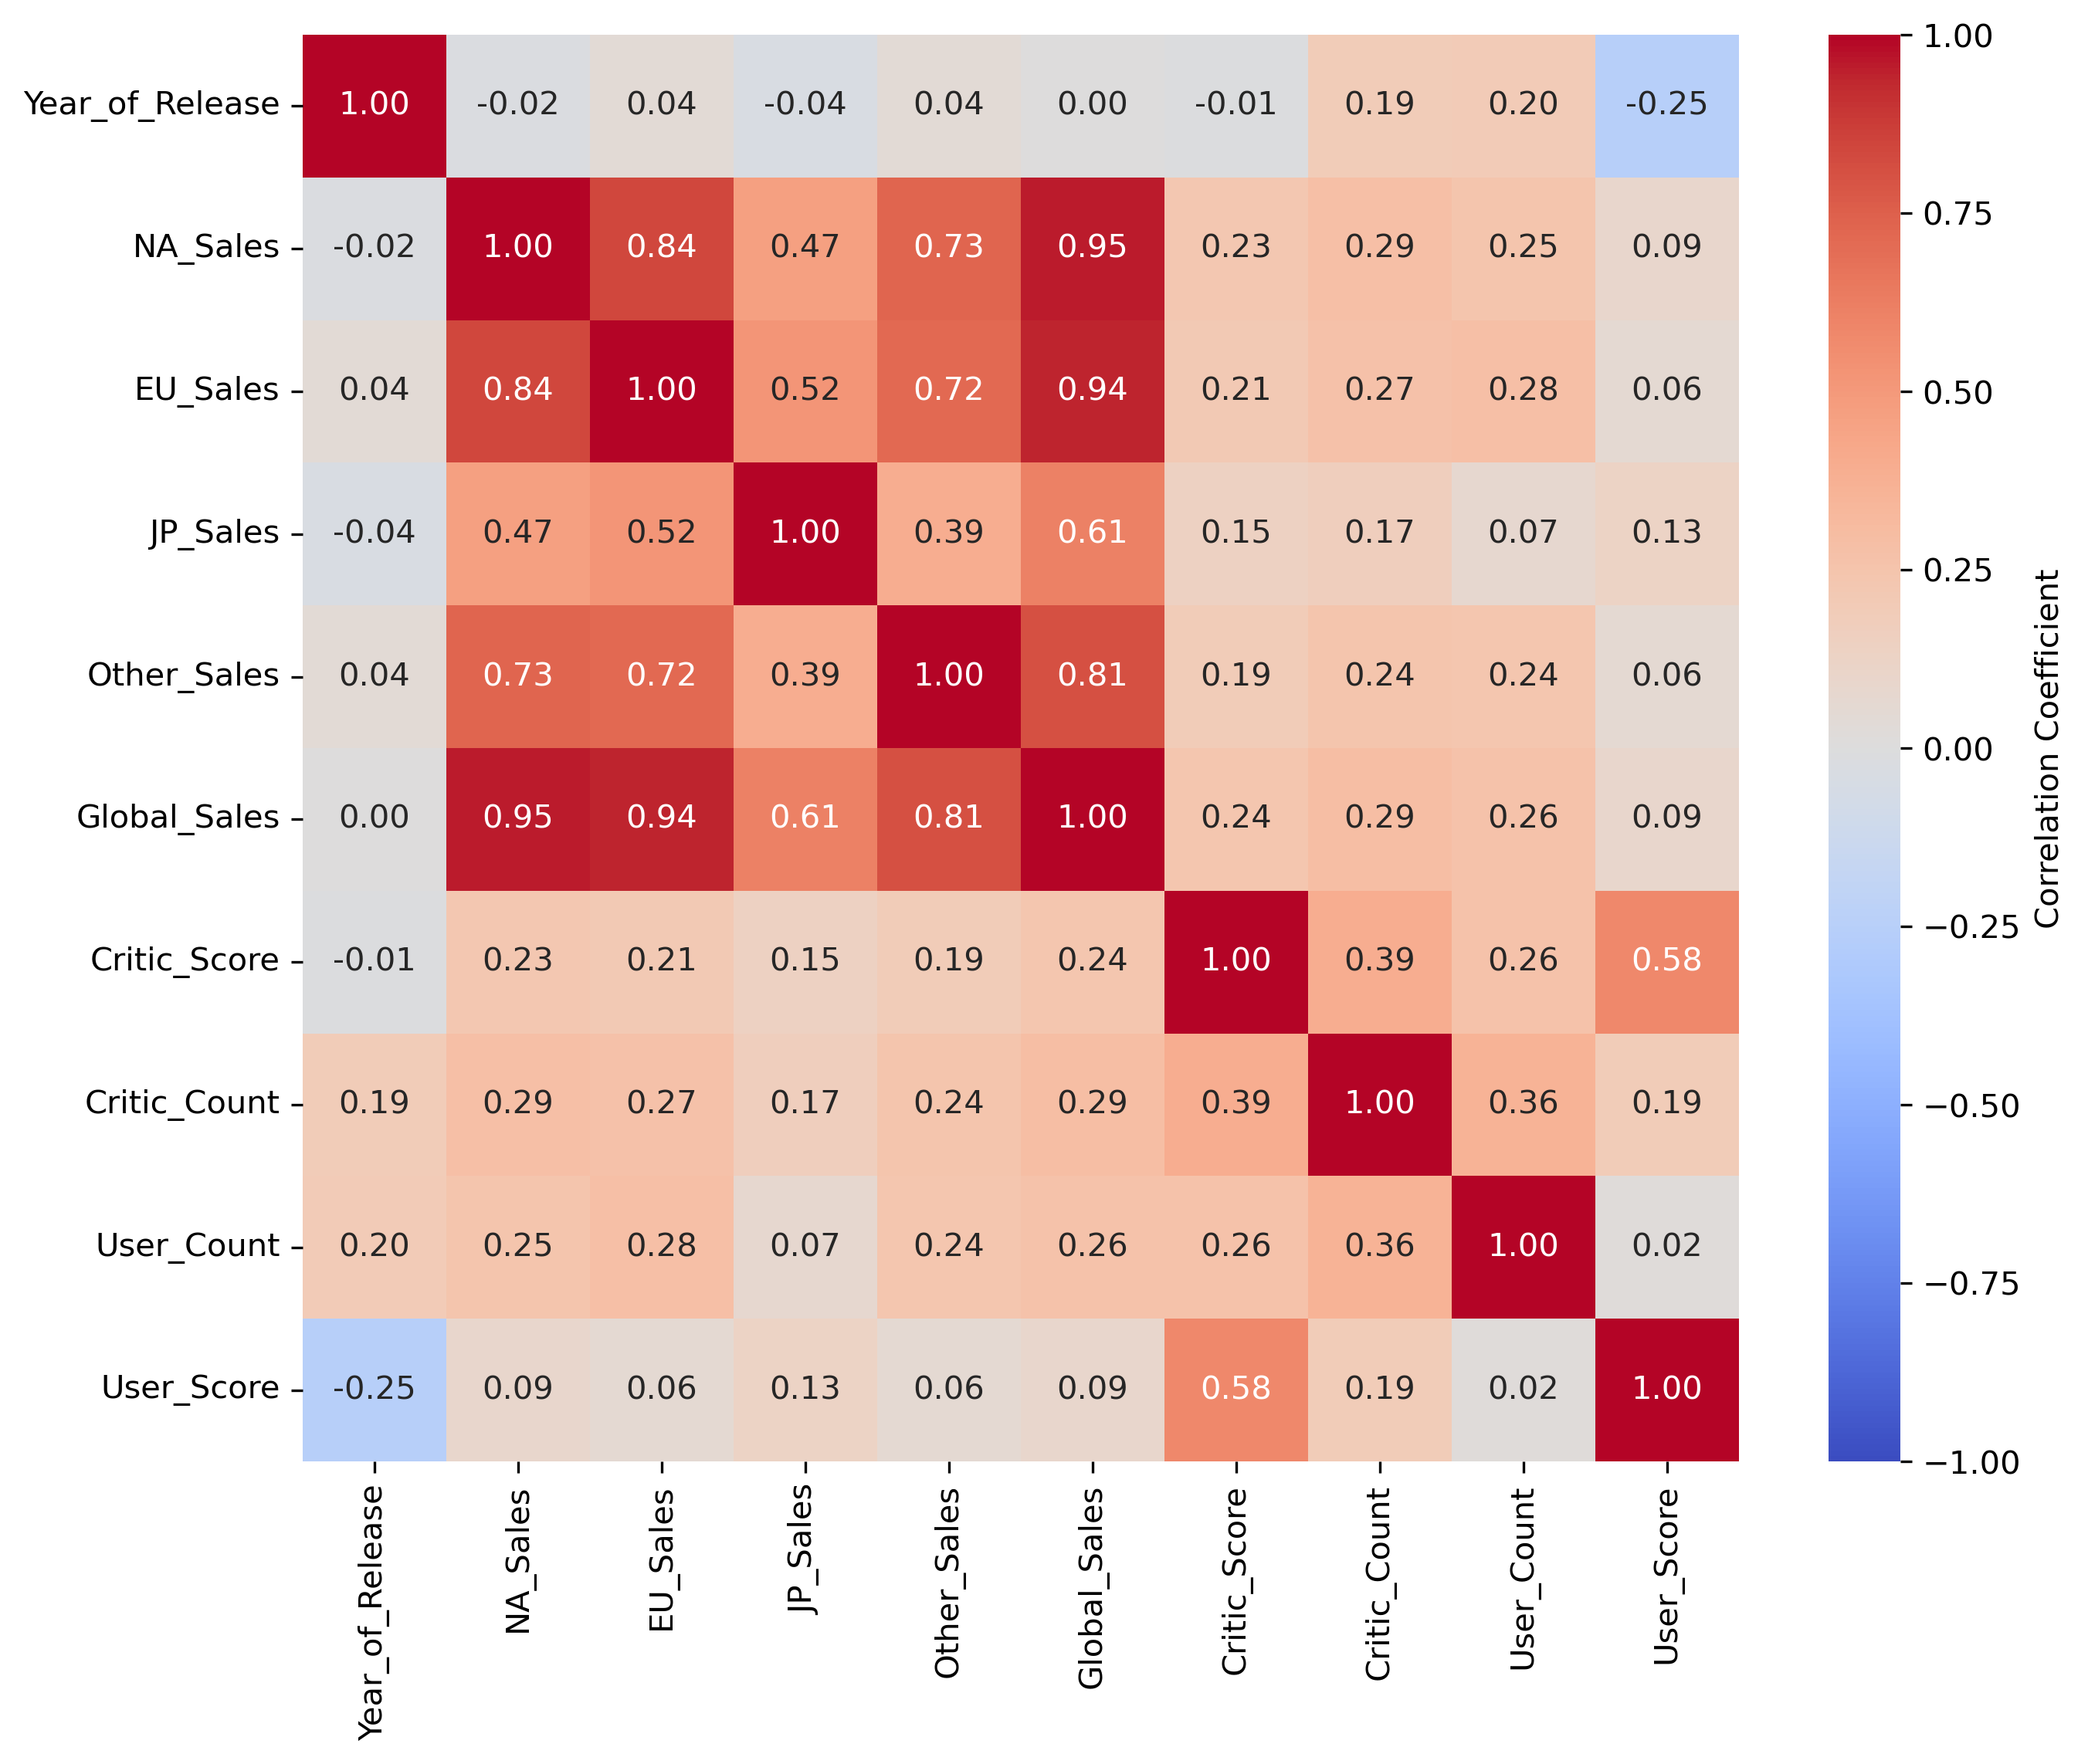

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric = ['Year_of_Release', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
           'Critic_Score', 'Critic_Count', 'User_Count', 'User_Score']
data_num = data[numeric].dropna() #eliminamos los NaN

corr_num = data_num.corr()
fig, ax = plt.subplots(figsize=(10, 8), dpi = 300)
sns.heatmap(corr_num, annot=True, fmt='.2f', cmap='coolwarm', 
            cbar_kws={'label': 'Correlation Coefficient'}, ax=ax, 
            vmin=-1, vmax=1)

Así, podemos ver cuales son los datos que se encuentran relacionados.

## 2. 

Analice la variable `Global_Sales`. ¿Cómo se relaciona con esta variable con los puntajes entregados por la crítica (`Critic_Score`) y los usuarios (`User_Score`)?

Text(0.5, 1.0, 'User Score vs Global Sales')

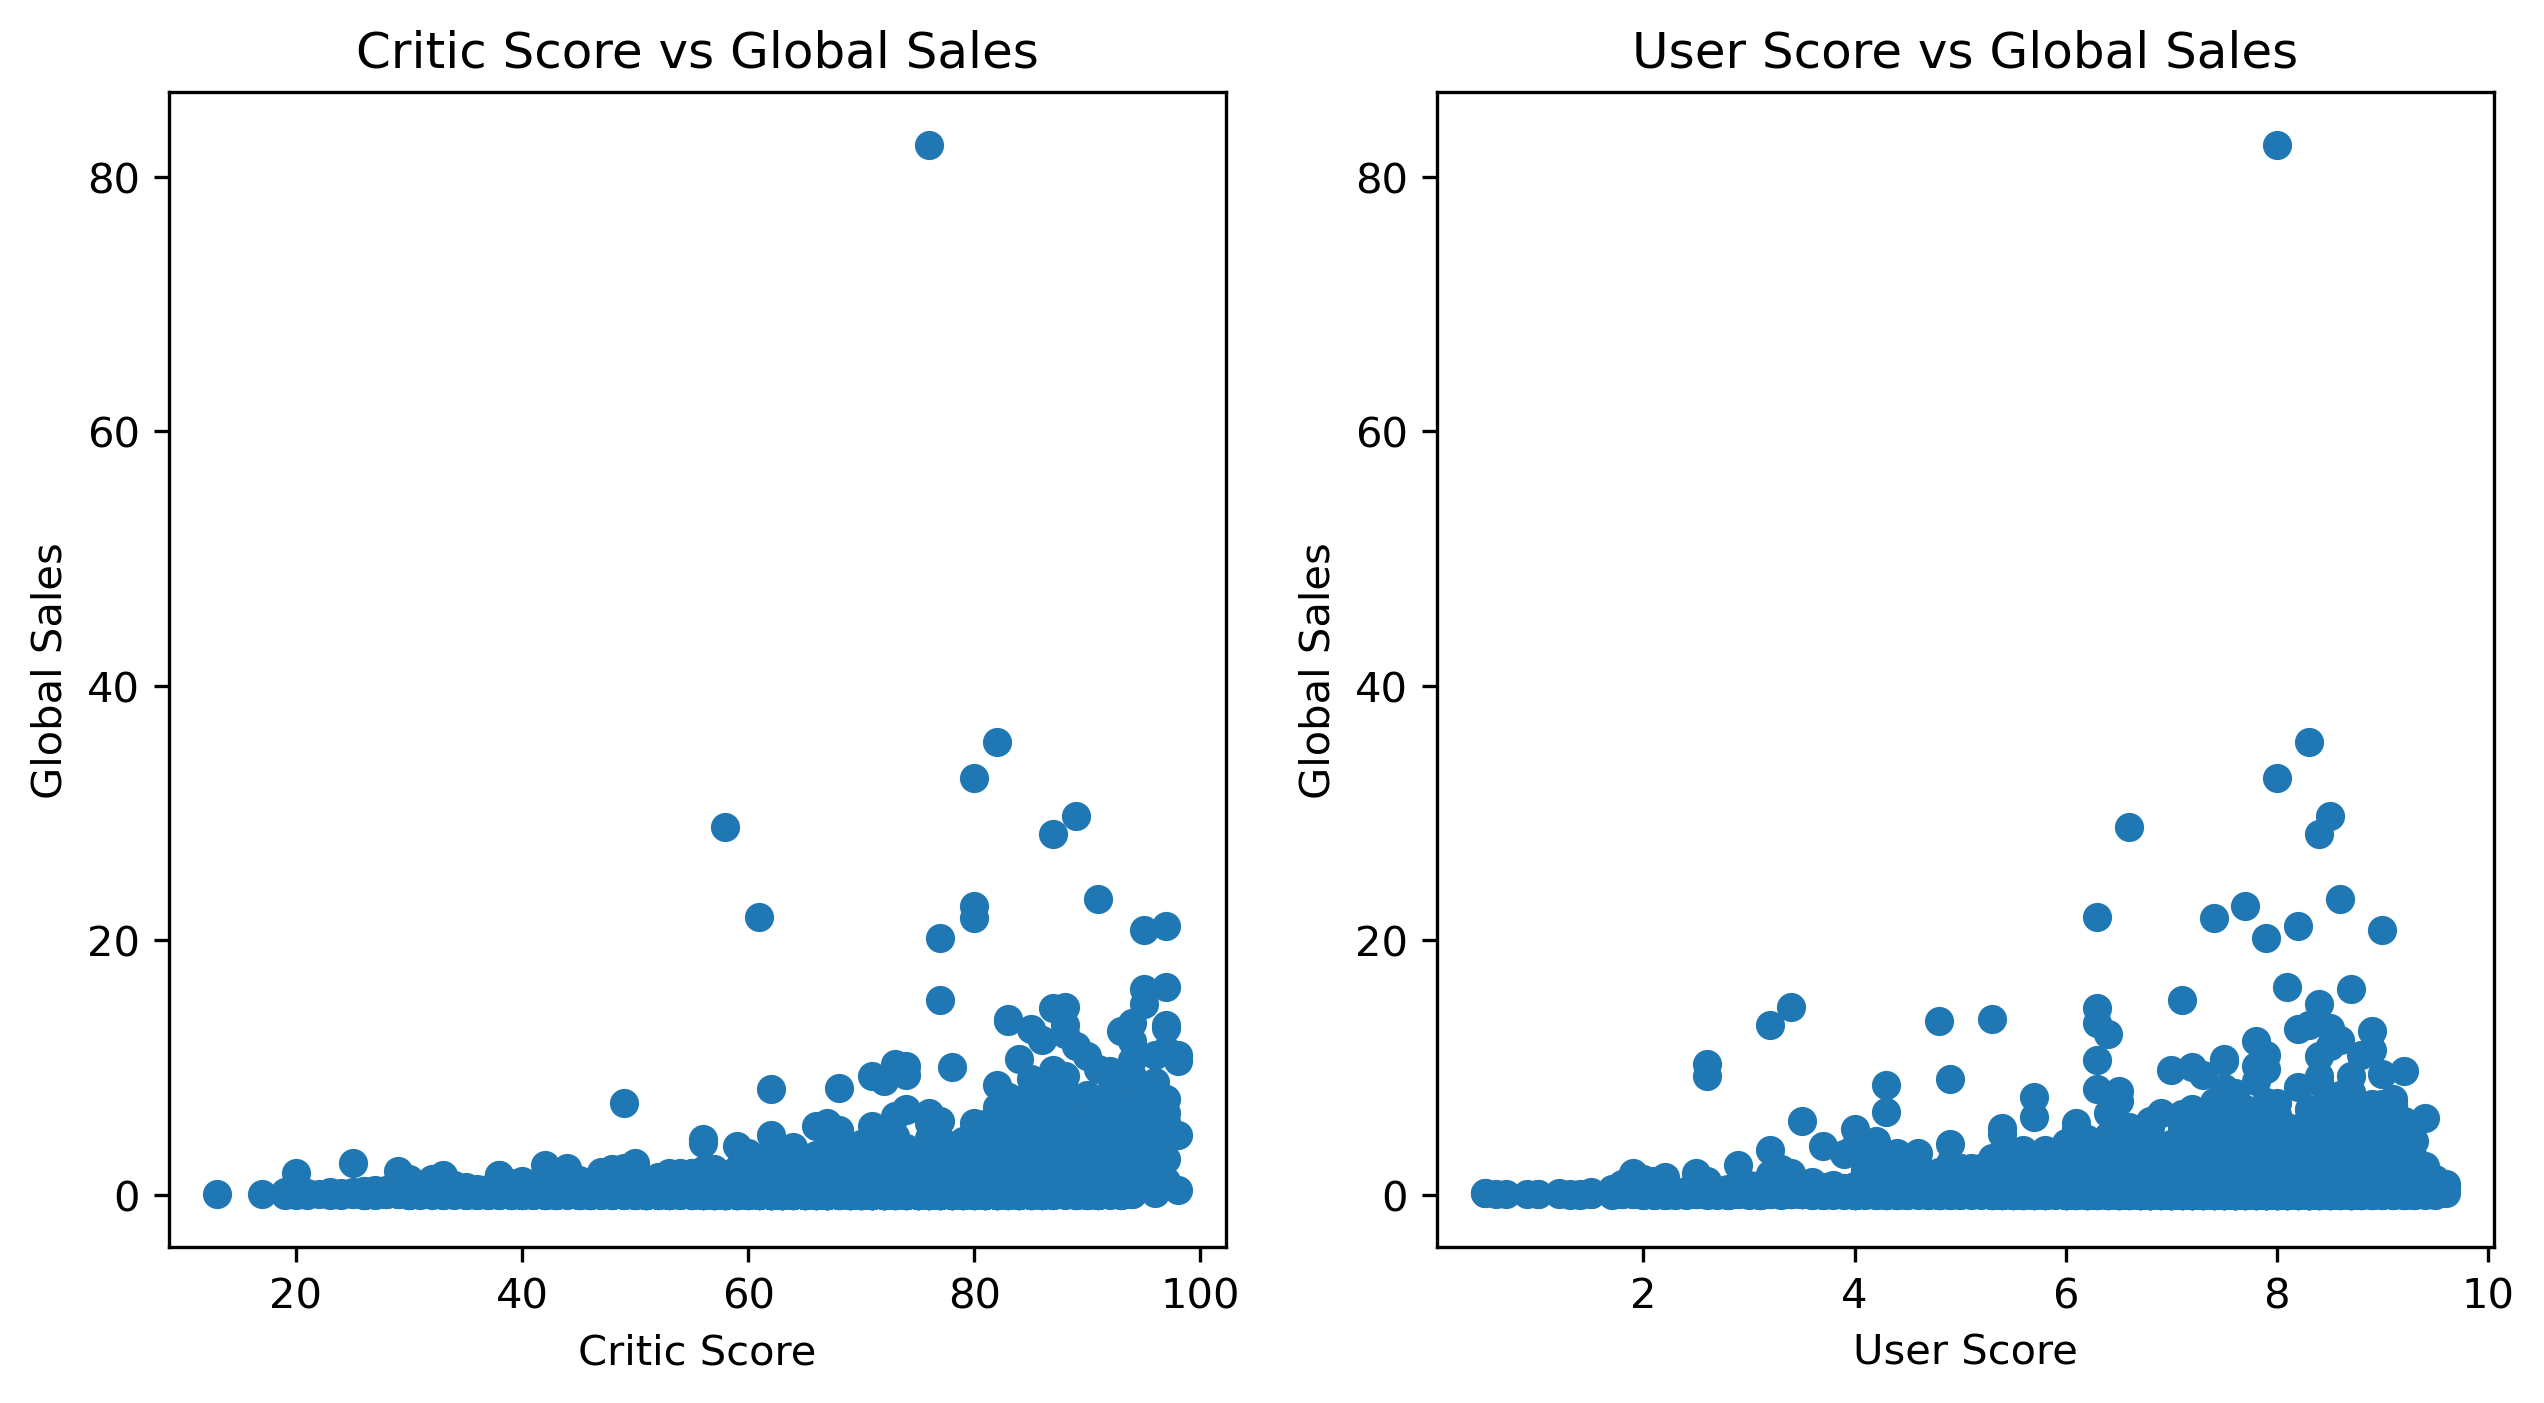

In [4]:
variables = data[['Global_Sales', 'Critic_Score', 'User_Score']].dropna()

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
ax[0].scatter(variables['Critic_Score'], variables['Global_Sales'])
ax[0].set_xlabel('Critic Score')
ax[0].set_ylabel('Global Sales')
ax[0].set_title('Critic Score vs Global Sales')

ax[1].scatter(variables['User_Score'], variables['Global_Sales'])
ax[1].set_xlabel('User Score')
ax[1].set_ylabel('Global Sales')
ax[1].set_title('User Score vs Global Sales')


## 3.

Calcule la correlación de Pearson entre las variables explicativas `Critic_Score` y `User_Score` y la variable de respuesta `Global_Sales`. Reporte la varianza de cada variable, y la covarianza y correlación entre las variables explicativas y de respuesta.

Recordemos que:

La covarianza para dos variables aleatorias independientes X e Y se define como
$$
\begin{align}
Cov(X, Y) = \sigma_{XY} &= \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] \\
Cov_{XY,sample} &= \frac{1}{n-1} \sum_{i = 1}^n (x_i - \overline{x})(y_i - \overline{y}) 
\end{align}
$$

Así, podemos definir la correlación de Pearson como:

$$
\begin{align}
\rho_{XY} &= \frac{\sigma_{XY}}{\sigma_X \sigma_Y}\\
&= \frac{Cov(X, Y)}{\sqrt{\mathbb{Var}(X) \mathbb{Var}(Y)}} \\
R_{XY}&= \frac{ \sum_{i = 1}^n (x_i - \overline{x})(y_i - \overline{y})}{n-1} \frac{\sqrt{n-1}}{\sqrt{\sum_{i=1}^n (x_i -\overline{x})^2}} \frac{\sqrt{n-1}}{\sqrt{\sum_{i=1}^n (y_i -\overline{y})^2}} \\
&= \frac{ \sum_{i = 1}^n (x_i - \overline{x})(y_i - \overline{y})}{ \sqrt{\sum_{i=1}^n (x_i -\overline{x})^2} \sqrt{\sum_{i=1}^n (y_i -\overline{y})^2}}
\end{align}
$$

In [26]:
import numpy as np
# Calcular la varianza de las puntuaciones de los críticos
# y de los usuarios, así como la varianza de las ventas globales
critic_var = np.var(variables['Critic_Score'])
user_var = np.var(variables['User_Score'])
global_var = np.var(variables['Global_Sales'])

# Calculo de las covarianzas 
covar_critic_global = np.cov(variables['Critic_Score'], variables['Global_Sales'])[0][1]
covar_user_global = np.cov(variables['User_Score'], variables['Global_Sales'])[0][1]

# Calculo de las correlaciones de Pearson
corr_critic_global = covar_critic_global / (np.sqrt(critic_var) * np.sqrt(global_var))
corr_user_global = covar_user_global / (np.sqrt(user_var) * np.sqrt(global_var))    

print(f'Varianza Critic Score: {critic_var:.4f}')
print(f'Varianza User Score: {user_var:.4f}')
print(f'Varianza Global Sales: {global_var:.4f}')
print(f'Covarianza Critic Score - Global Sales: {covar_critic_global:.4f}')
print(f'Covarianza User Score - Global Sales: {covar_user_global:.4f}')
print(f'Correlación Critic Score - Global Sales: {corr_critic_global:.4f}')
print(f'Correlación User Score - Global Sales: {corr_user_global:.4f}')


Varianza Critic Score: 192.7541
Varianza User Score: 2.0859
Varianza Global Sales: 3.7141
Covarianza Critic Score - Global Sales: 6.3369
Covarianza User Score - Global Sales: 0.2456
Correlación Critic Score - Global Sales: 0.2368
Correlación User Score - Global Sales: 0.0882


## 4. 

Realice ahora un test de hipótesis sobre el coeficiente de correlación. ¿Qué tan significativos son los resultados previamente calculados?


El coeficiente de correlación de Pearson puede ser utilizado como un test de hipótesis también. En este caso se posee el siguiente de hipotesis nula y alternativa:
$$
H_0: \rho = 0
$$
$$
H_a: \rho\neq 0
$$

En este caso, el estadístico de prueba que se utiliza es:
$$
T_0 = \frac{R \sqrt{n-2}}{\sqrt{1-R^2}}
$$

Donde $R = R_XY$ que es el coeficiente de correlación de Pearson. El estadístico $T_0$ sigue una distribución T con $n-2$ grados de libertad, i.e., $T_0\sim t_{n-2}$. Así, podemos evaluar si la correlación encontrada es significativa al existir algún tipo de correlación, y por ende, relación lineal. 


In [27]:
# correlación de pearson ahora con p-value
import scipy.stats as st

# Correlación de Pearson entre Critic Score y Global Sales
corr_critic_global, p_value_critic = st.pearsonr(variables['Critic_Score'], variables['Global_Sales'])
# Correlación de Pearson entre User Score y Global Sales
corr_user_global, p_value_user = st.pearsonr(variables['User_Score'], variables['Global_Sales'])

pd.DataFrame({'Variable 1': ['Critic Score', 'User Score'],
                 'Variable 2': ['Global Sales', 'Global Sales'],
                 'Correlación': [corr_critic_global, corr_user_global],
                 'p-value': [p_value_critic, p_value_user]})



,Variable 1,Variable 2,Correlación,p-value
0,Critic Score,Global Sales,0.236805,3.222004e-92
1,User Score,Global Sales,0.088211,6.700688e-14


Al igual que los test paramétricos, que preveían alternativas a los métodos t-test o ANOVA, existen alternativas para la correlación de Pearson. 

En este caso, tenemos la correlación de Spearman ([spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)), la cual permite evaluar la correlación entre dos sets de datos mediante la utilización de los rankings de los datos.

In [7]:

# Correlación de Pearson entre Critic Score y Global Sales
corr_critic_global, p_value_critic = st.spearmanr(variables['Critic_Score'], variables['Global_Sales'])
# Correlación de Pearson entre User Score y Global Sales
corr_user_global, p_value_user = st.spearmanr(variables['User_Score'], variables['Global_Sales'])

pd.DataFrame({'Variable 1': ['Critic Score', 'User Score'],
                 'Variable 2': ['Global Sales', 'Global Sales'],
                 'Correlación': [corr_critic_global, corr_user_global],
                 'p-value': [p_value_critic, p_value_user]})



,Variable 1,Variable 2,Correlación,p-value
0,Critic Score,Global Sales,0.375849,4.563159e-240
1,User Score,Global Sales,0.157774,2.643829e-41


Existen otros tipos de metricas similares a la correlación. Por ejemplo:
- Medida de información mutua: [Mutual Information](https://www.kaggle.com/code/ryanholbrook/mutual-information). Para relaciones no-lineales
- Kendall Tau: [Kendall Tau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html). Pero este se usa para datos ordinales.

Cada uno con diferentes fortalezas y debilidades en su formulación.

## 5.

Realice una **regresión lineal simple** que relacione las variables analizadas. 

### a.
Calcule los parámetros de la regresión con las formulas correspondientes.

La ecuación de la regresión lineal simple es:
$$
y_i = \beta_1 x_i + \beta_0 + \varepsilon
$$

Una buena forma para poder realizar la estimación de parámetros es minimizar la suma de del error cuadrático:
$$
\begin{align}
\min L &= \sum_{i = 1}^n (y_i - \beta_1 x_i - \beta_0 )^2\\
\end{align}
$$
Donde $L$ puede verse como:

$$
\begin{align}
L&= \sum_{i = 1}^n (y_i - \beta_1 x_i - \beta_0 )^2 \\
&= \varepsilon_i ^2
\end{align}
$$

En este caso, tenemos un problema de optimización que se puede resolver al obtener un gradiente igual a 0. De esta forma:
$$
\nabla_{\beta_0, \beta_1} L(\widehat{\beta}_0, \widehat{\beta}_1) = \mathbf{0}
$$
En donde buscamos los estimadores para $\beta_0$ y $\beta_1$, $\widehat{\beta}_0$ y $\widehat{\beta}_1$ respectivamente. Así, tenemos el siguiente sistema de ecuaciones
$$
\begin{align}
\frac{\partial L}{\partial \beta_0}\left\vert_{\widehat{\beta}_0, \widehat{\beta}_1}\right. &= -2\sum_{i=1}^n (y_i -\widehat{\beta}_0 - \widehat{\beta}_1x_i) = 0 \\
\frac{\partial L}{\partial \beta_1}\left\vert_{\widehat{\beta}_0, \widehat{\beta}_1}\right. &= -2\sum_{i=1}^n (y_i -\widehat{\beta}_0 - \widehat{\beta}_1x_i)x_i = 0
\end{align}
$$

Trabajando estas ecuaciones llegamos a las **ecuaciones cuadráticas normales.** (least squares normal equations).

$$
\begin{align}
\widehat{\beta_1} = \frac{S_{XY}}{S_{XX}}\\
\widehat{\beta_0} = \overline{y} - \widehat{\beta_1}\overline{x}
\end{align}
$$

Donde
$$
\begin{align}
S_{XY} &= \sum_{i=1}^n (y_i - \overline{y}) (x_i -\overline{x}) \\ 
S_{XX} &= \sum_{i = 1}^n (x_i - \overline{x})^2
\end{align}
$$

En este caso, es interesante ver como el coeficiente $\widehat{\beta}_1$ se relaciona con la correlación de Pearson.
$$
\begin{align}
R_{XY} &= \frac{ \sum_{i = 1}^n (x_i - \overline{x})(y_i - \overline{y})}{ \sqrt{\sum_{i=1}^n (x_i -\overline{x})^2} \sqrt{\sum_{i=1}^n (y_i -\overline{y})^2}}\\
&= \frac{S_{XY}}{\sqrt{S_{XX} S_{YY}}}
\end{align}
$$

Notar que en el libro $S_{YY} = SS_T$, así que seguiremos esa notación.
$$
\begin{align}
R_{XY} &= \frac{ \sum_{i = 1}^n (x_i - \overline{x})(y_i - \overline{y})}{ \sqrt{\sum_{i=1}^n (x_i -\overline{x})^2} \sqrt{\sum_{i=1}^n (y_i -\overline{y})^2}}\\
&= \frac{S_{XY}}{\sqrt{S_{XX} SS_{T}}}
\end{align}
$$
Así:

$$
R_{XY} = \widehat{\beta}_1 \left(\frac{S_{XX}}{SS_T}\right)^{1/2} \Leftrightarrow \widehat{\beta}_1  = R_{XY} \left(\frac{SS_{T}}{S_{XX}}\right)^{1/2}
$$

Así, existe una relación lineal entre  $\widehat{\beta}_1$  y $R_{XY}$





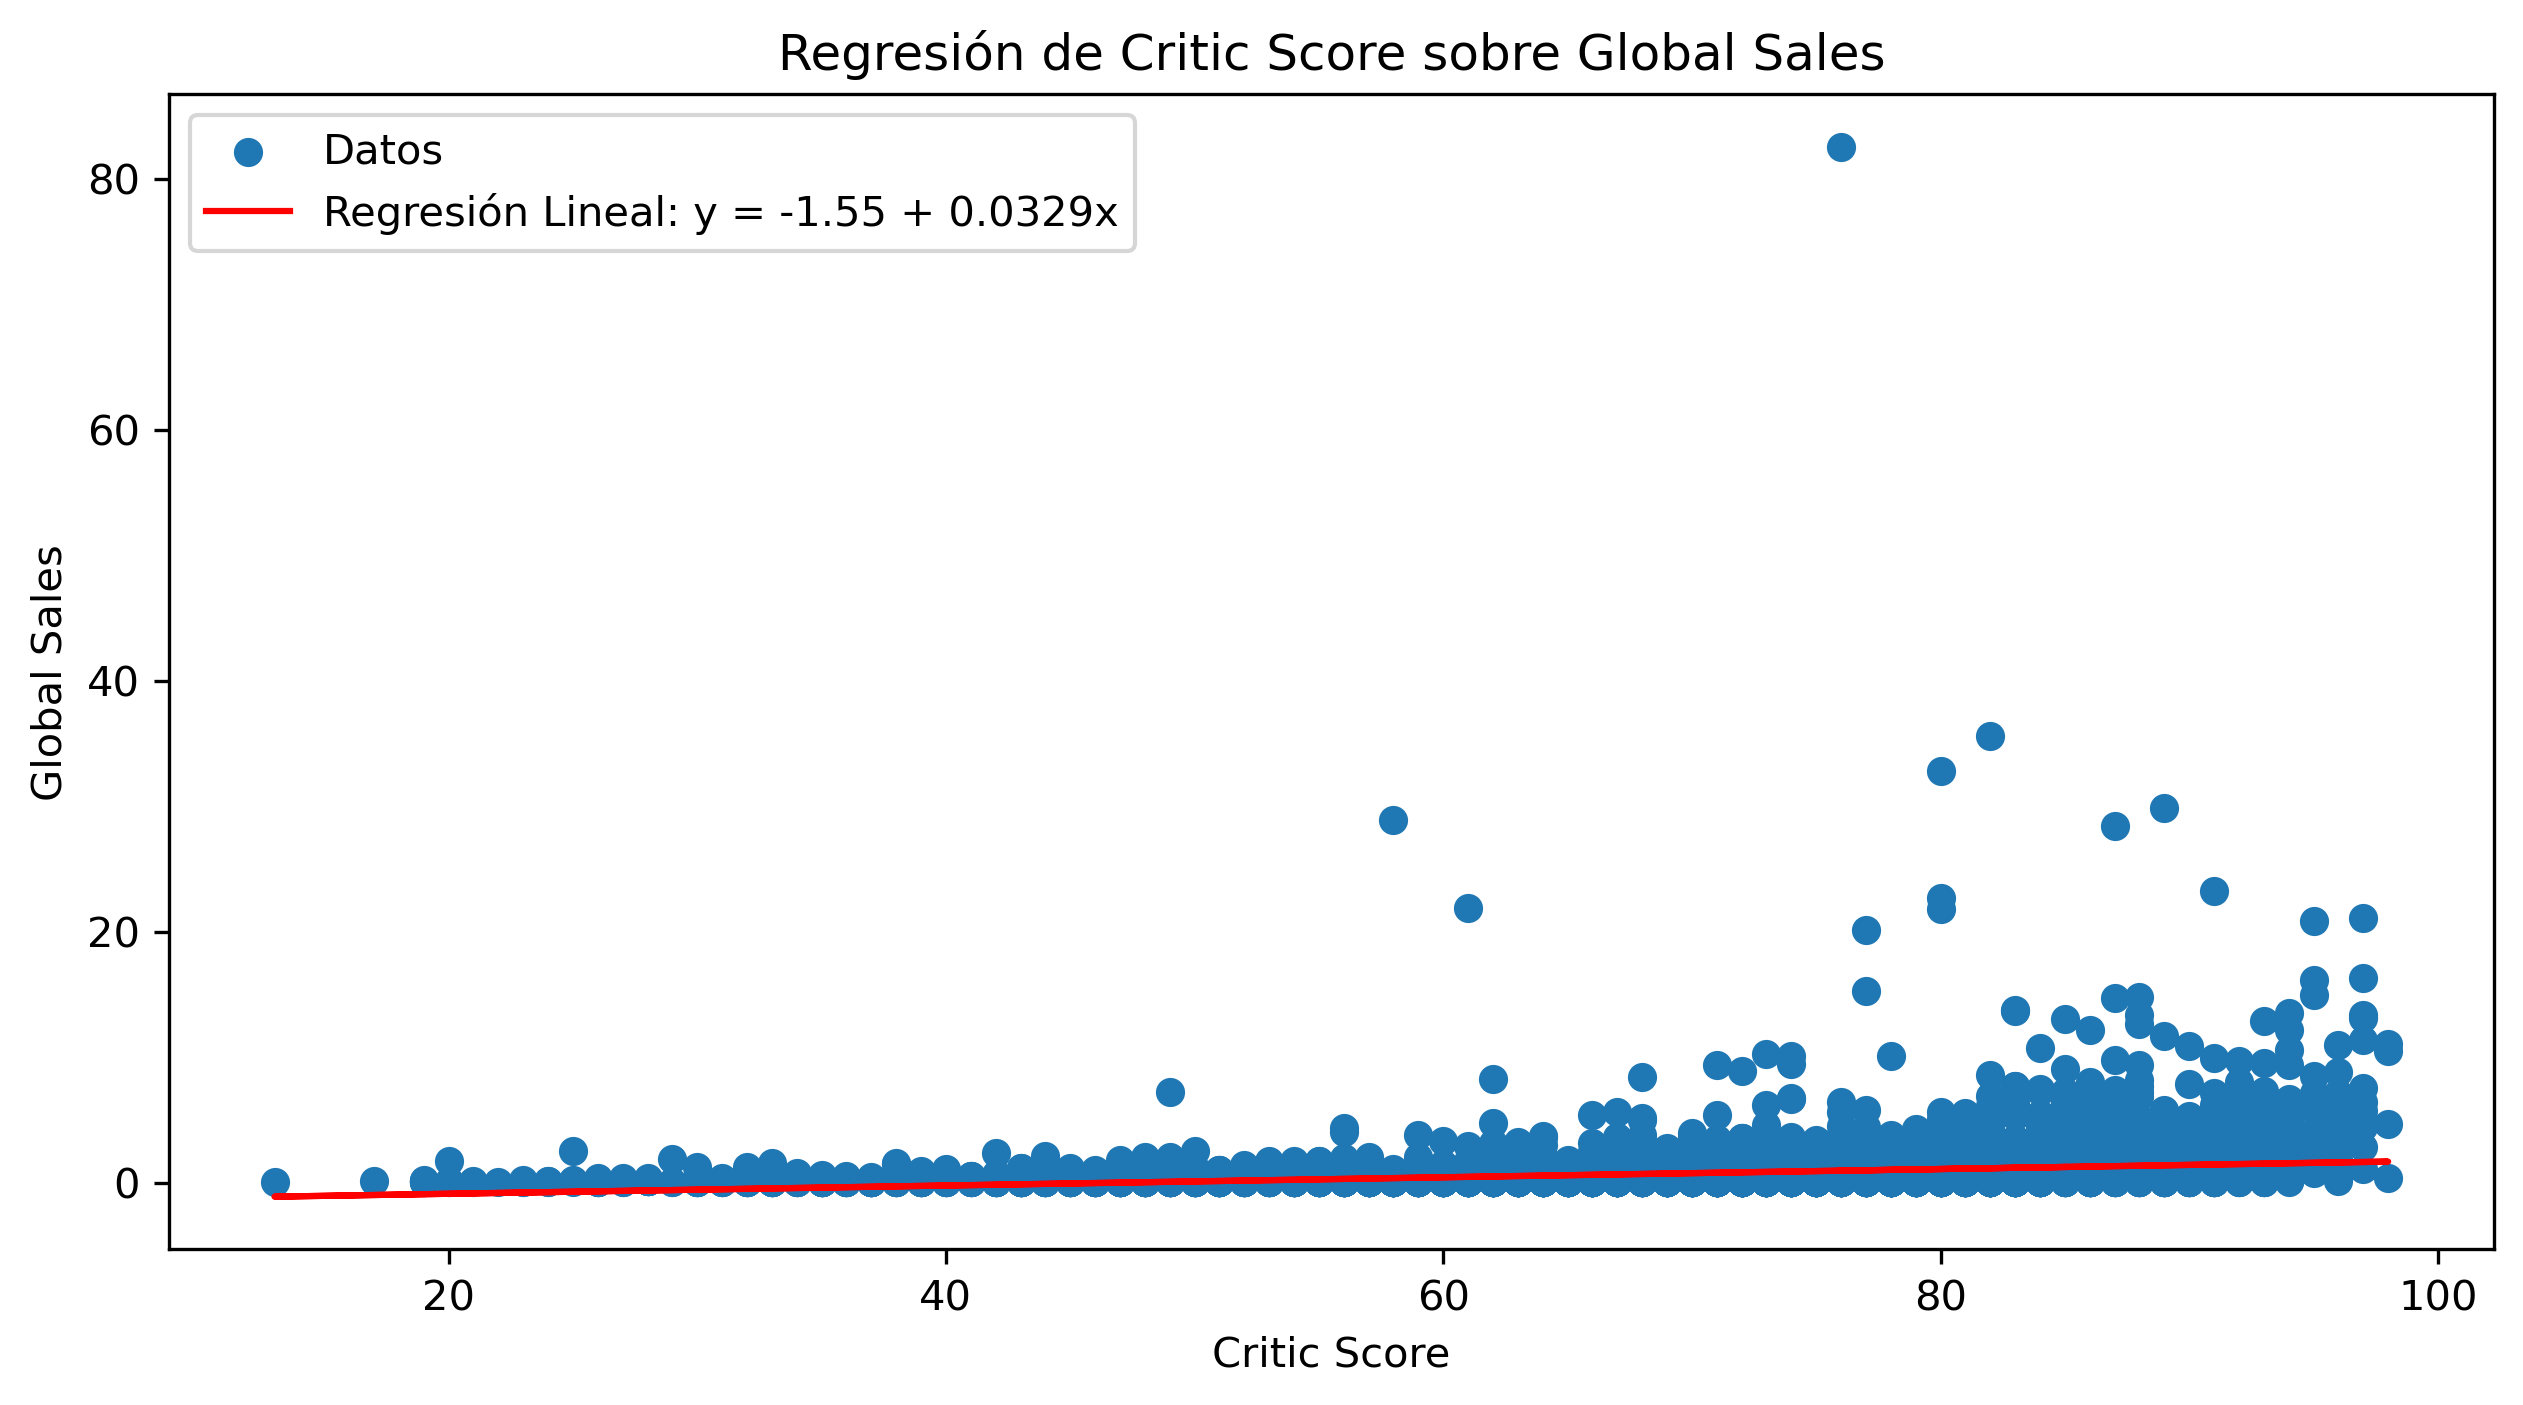

In [8]:
# Para critic score
media_critic = variables['Critic_Score'].mean()
media_user = variables['User_Score'].mean()
media_sales = variables['Global_Sales'].mean()

### Regresion f(critic) = sales

s_XY = np.sum(
    (variables['Critic_Score'] - media_critic) * (variables['Global_Sales'] - media_sales)
)
s_XX = np.sum(
    (variables['Critic_Score'] - media_critic) ** 2
)
b1_critic = s_XY / s_XX
b0_critic = media_sales - b1_critic * media_critic
# Predicción
y_hat = b0_critic + b1_critic * variables['Critic_Score']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.scatter(variables['Critic_Score'], variables['Global_Sales'], label='Datos')
ax.plot(variables['Critic_Score'], y_hat, color='red', label=f'Regresión Lineal: y = {b0_critic:.2f} + {b1_critic:.4f}x')
ax.set_xlabel('Critic Score')
ax.set_ylabel('Global Sales')
ax.set_title('Regresión de Critic Score sobre Global Sales')
ax.legend()

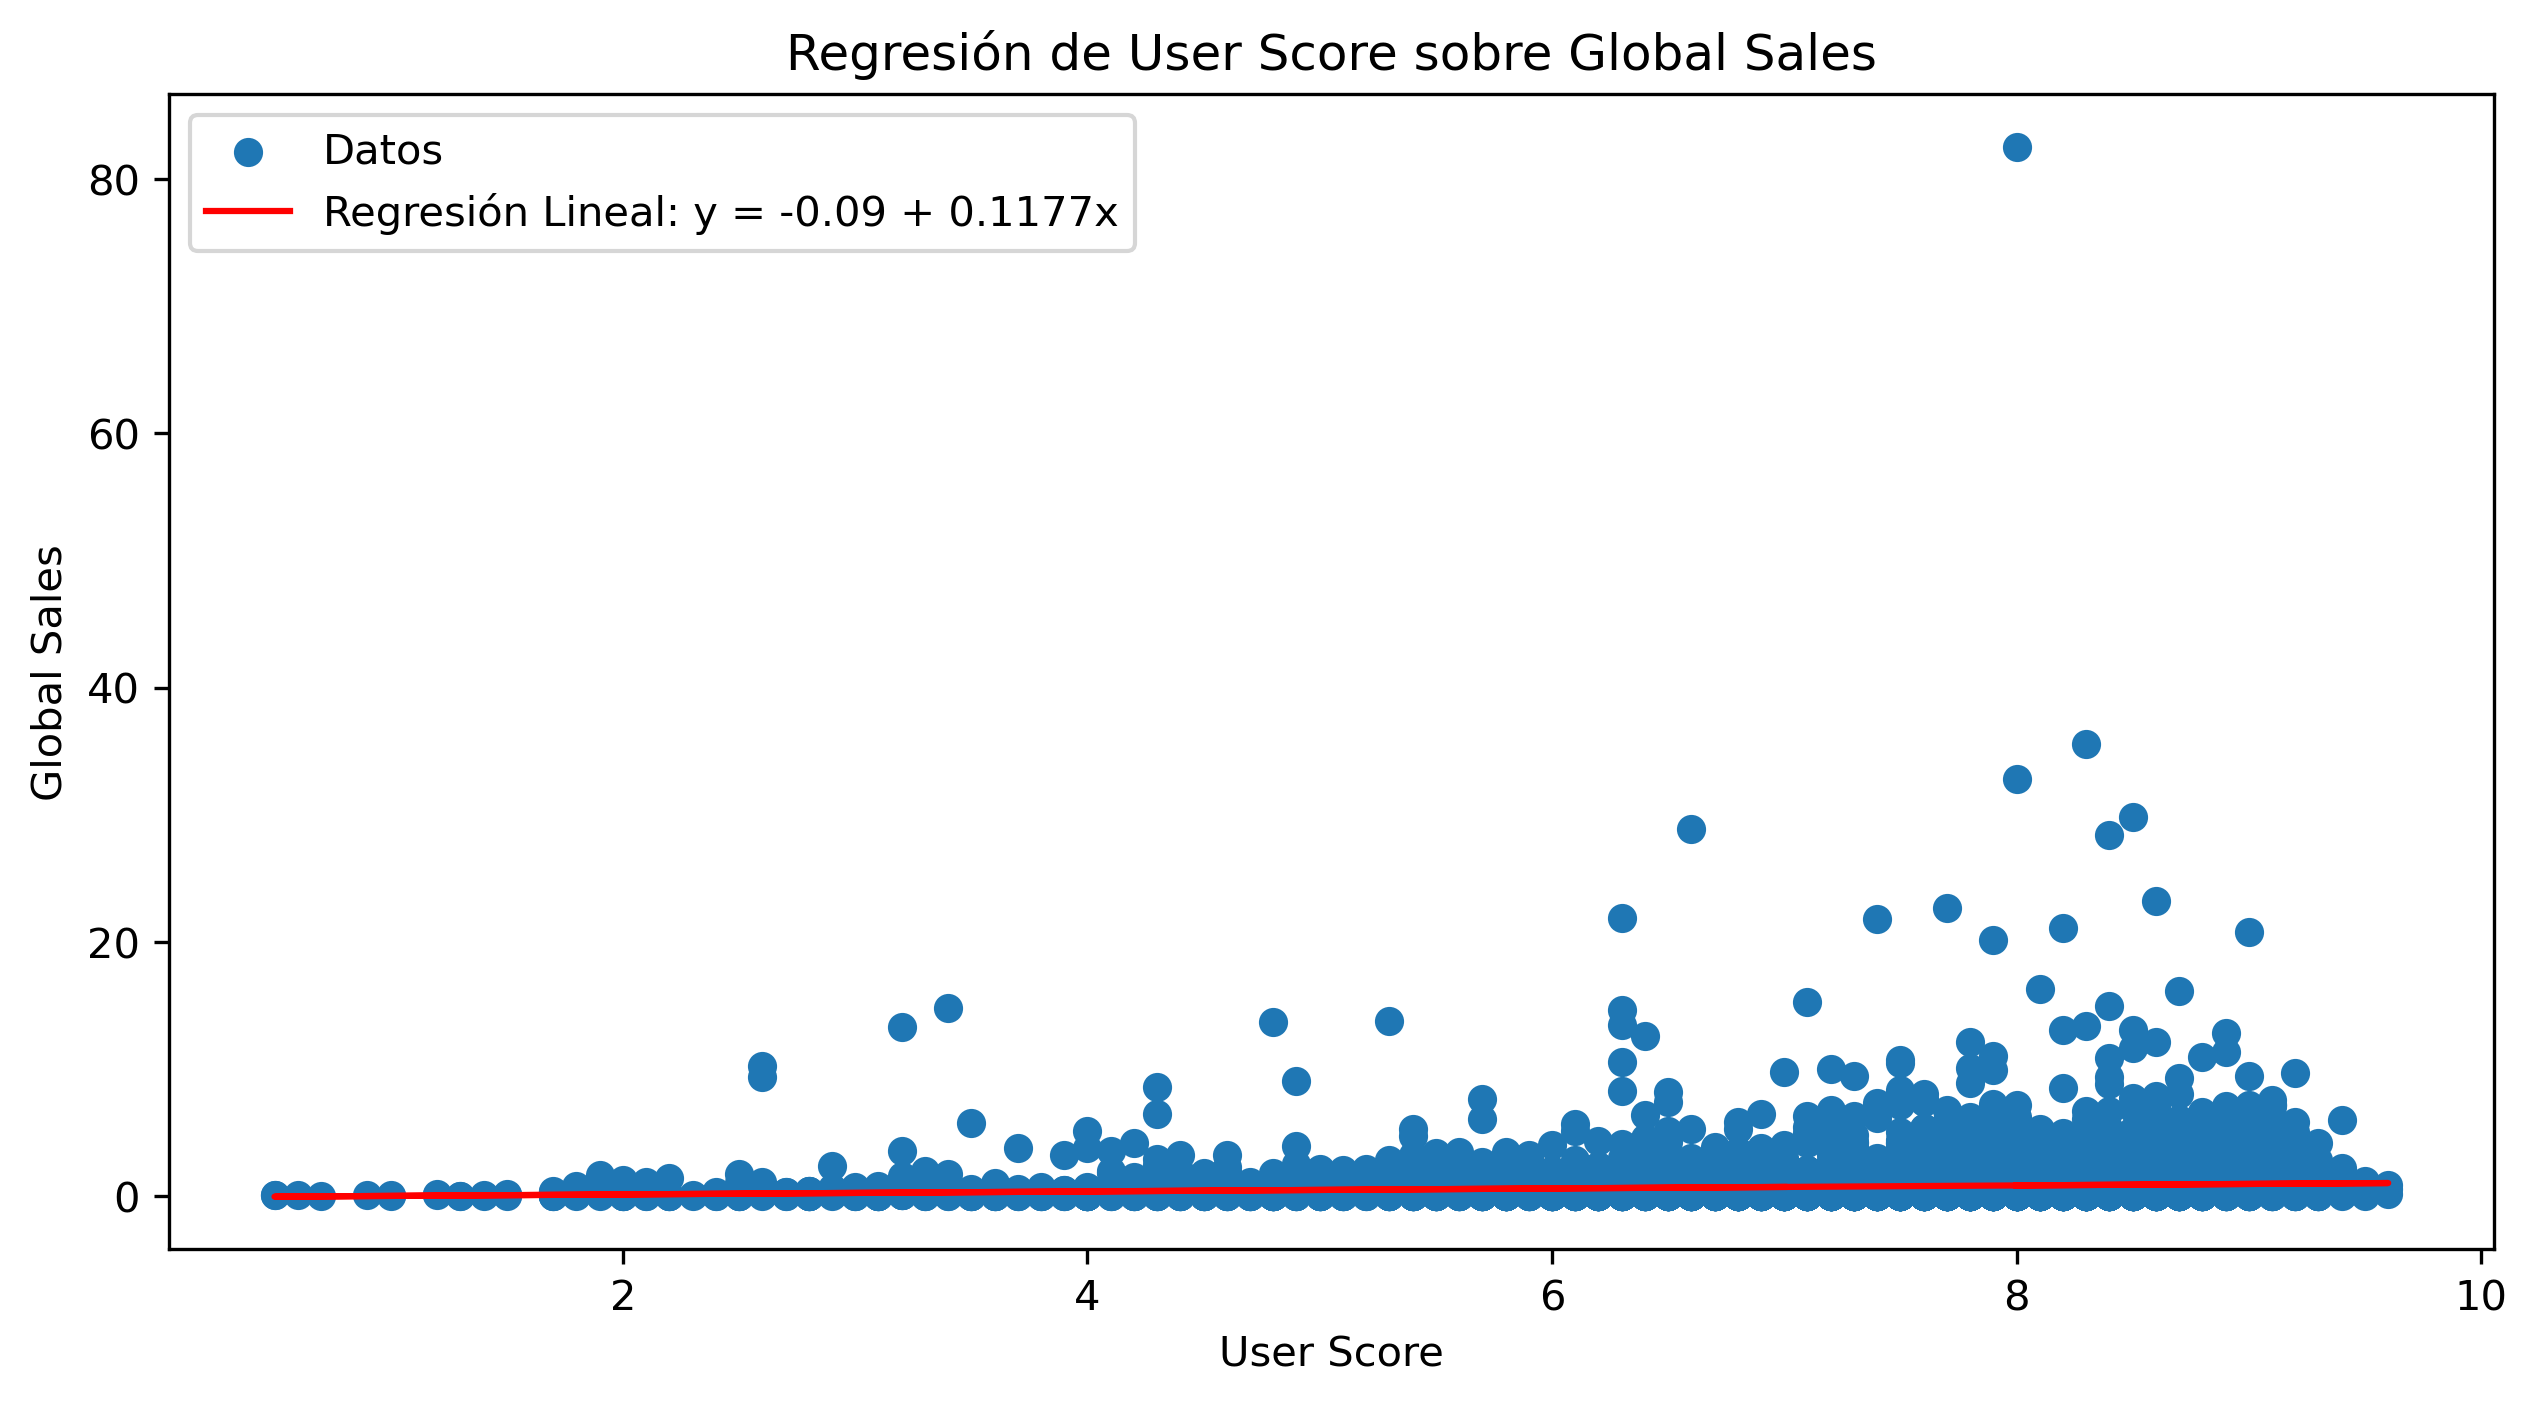

In [9]:
# Para critic score
media_critic = variables['Critic_Score'].mean()
media_user = variables['User_Score'].mean()
media_sales = variables['Global_Sales'].mean()

### Regresion f(critic) = sales

s_XY = np.sum(
    (variables['User_Score'] - media_user) * (variables['Global_Sales'] - media_sales)
)
s_XX = np.sum(
    (variables['User_Score'] - media_user) ** 2
)
b1_critic = s_XY / s_XX
b0_critic = media_sales - b1_critic * media_user
# Predicción
y_hat = b0_critic + b1_critic * variables['User_Score']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.scatter(variables['User_Score'], variables['Global_Sales'], label='Datos')
ax.plot(variables['User_Score'], y_hat, color='red', label= f'Regresión Lineal: y = {b0_critic:.2f} + {b1_critic:.4f}x')
ax.set_xlabel('User Score')
ax.set_ylabel('Global Sales')
ax.set_title('Regresión de User Score sobre Global Sales')
ax.legend()

### b.

Utilice la función de su librería favorita en `python` y compare con los resultados anteriores.

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     427.1
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           3.22e-92
Time:                        09:46:11   Log-Likelihood:                -14714.
No. Observations:                7191   AIC:                         2.943e+04
Df Residuals:                    7189   BIC:                         2.945e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5495      0.114    -13.610   

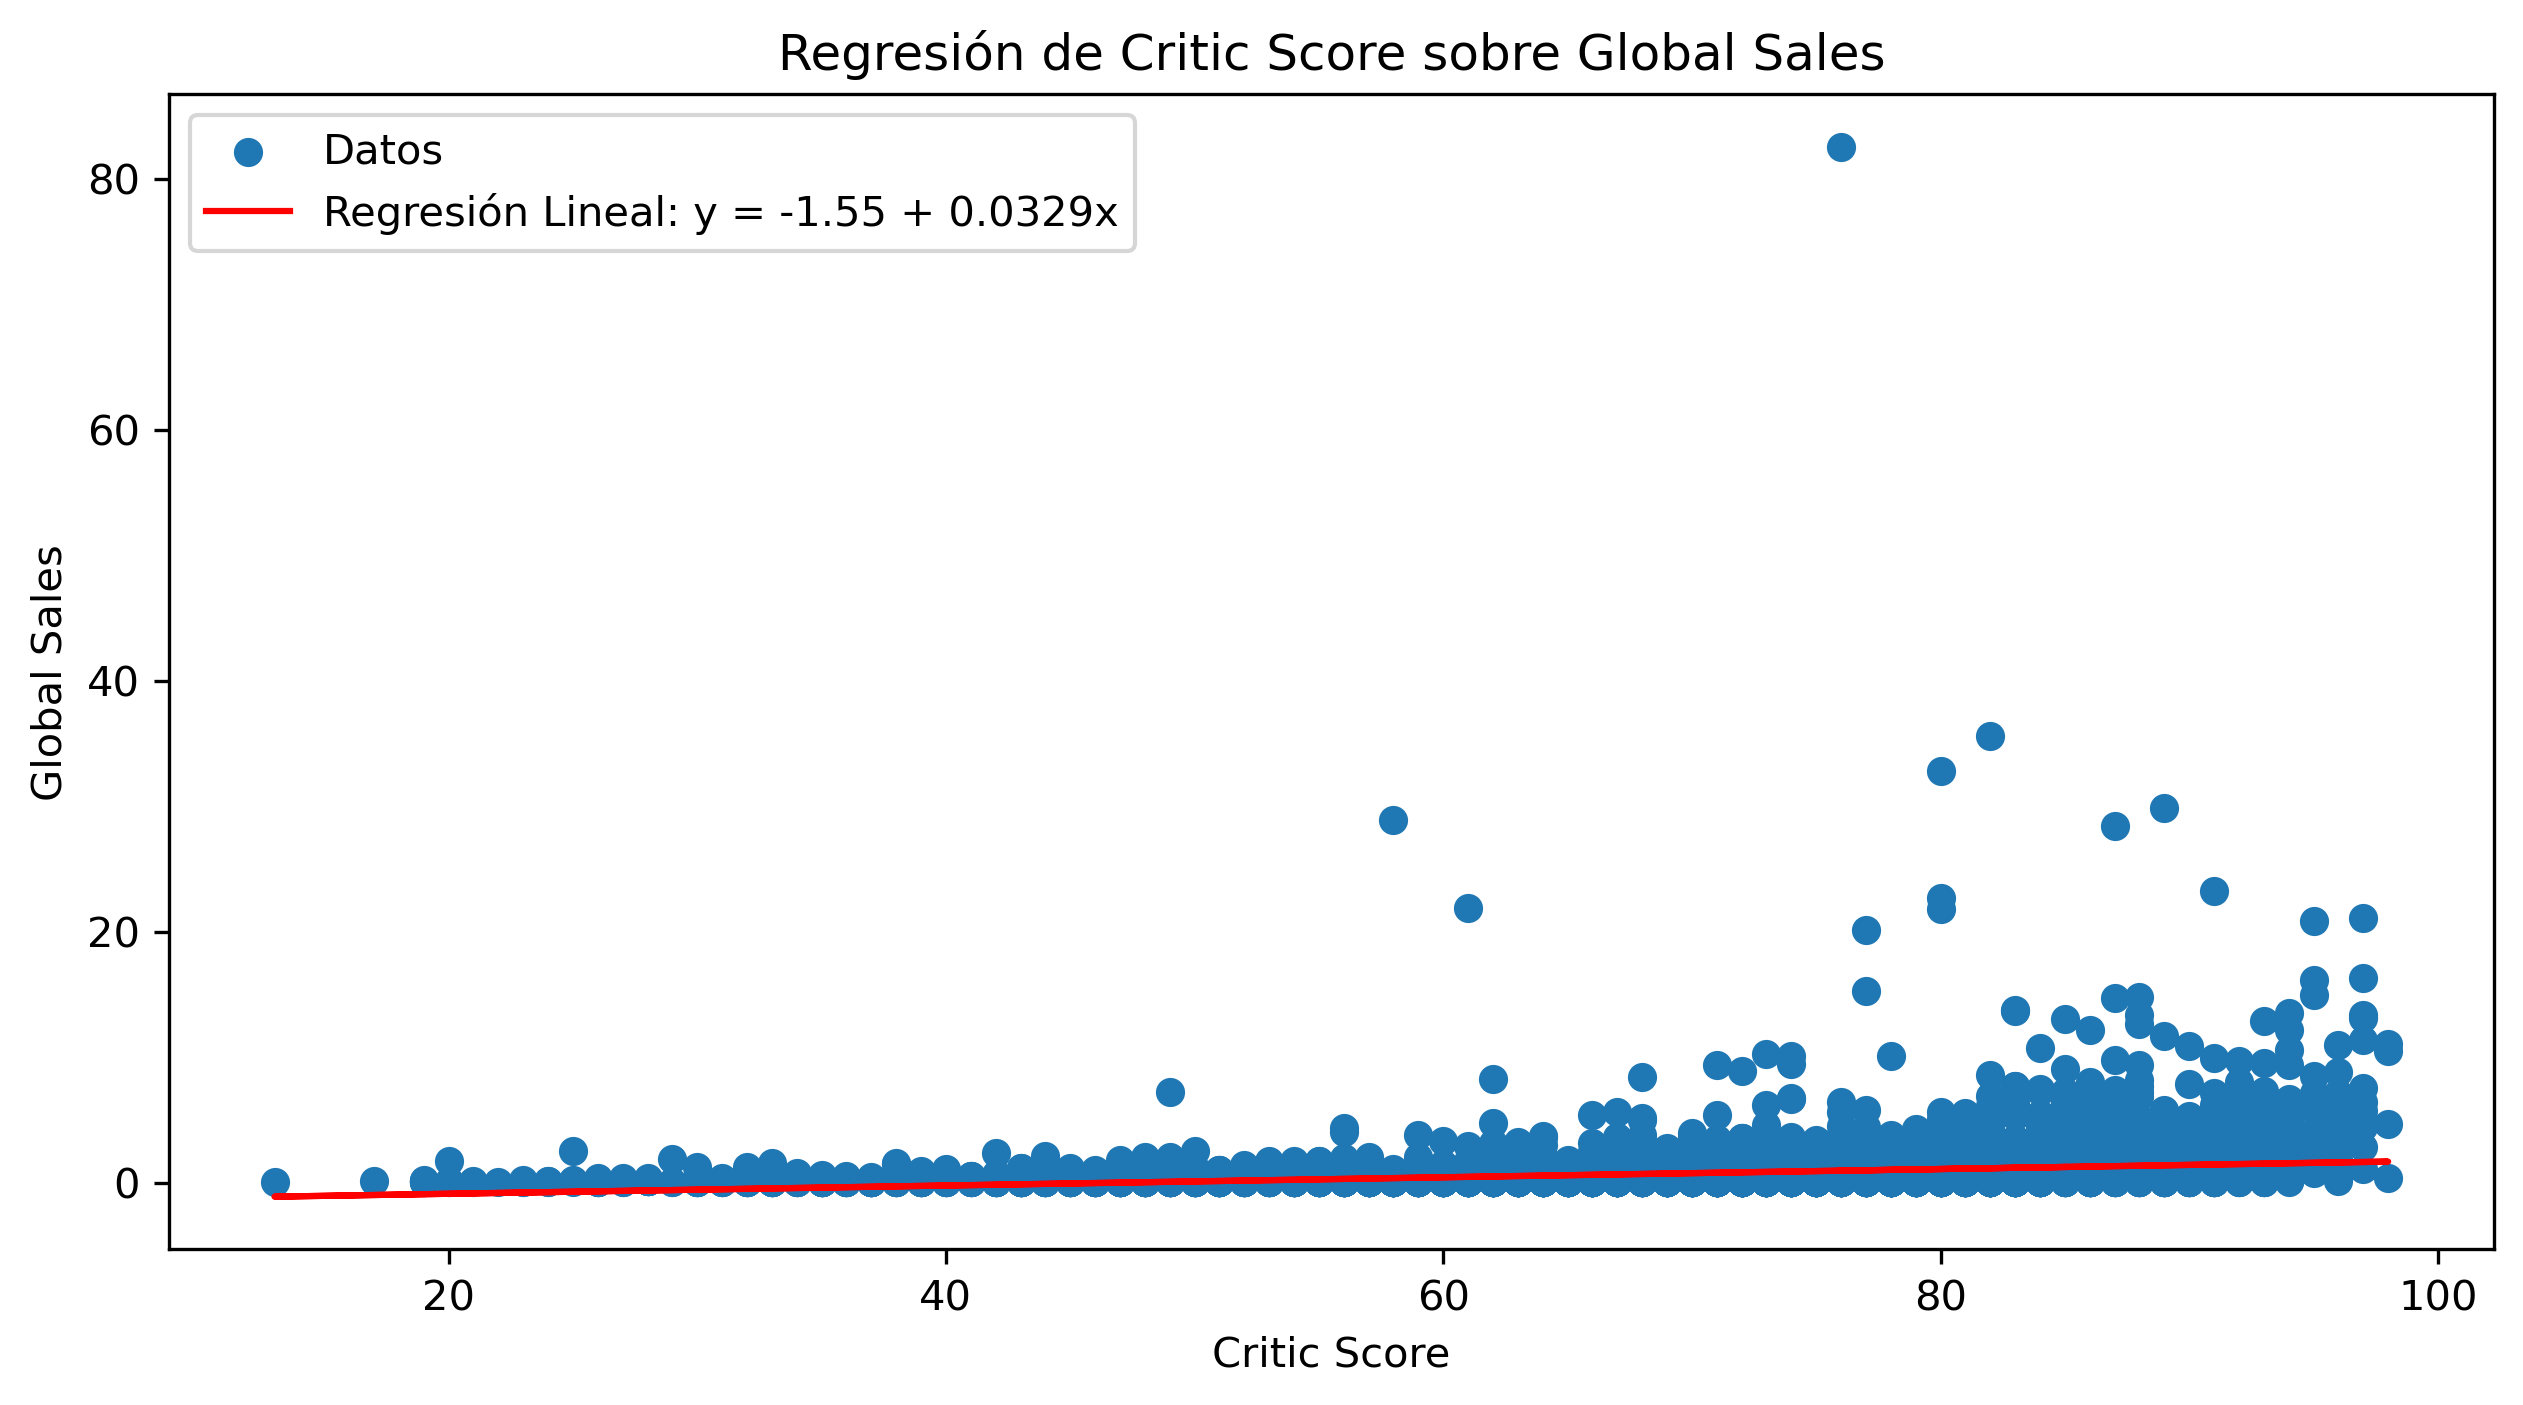

In [10]:
import statsmodels.api as sm

# Definir la variable dependiente y la independiente
y = variables['Global_Sales']
x = variables[['Critic_Score']]
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()

print(model.summary())

beta_0, beta_1 = model.params

# Predicción
y_hat = beta_0 + beta_1 * variables['Critic_Score']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.scatter(variables['Critic_Score'], variables['Global_Sales'], label='Datos')
ax.plot(variables['Critic_Score'], y_hat, color='red', label=f'Regresión Lineal: y = {beta_0:.2f} + {beta_1:.4f}x')
ax.set_xlabel('Critic Score')
ax.set_ylabel('Global Sales')
ax.set_title('Regresión de Critic Score sobre Global Sales')
ax.legend()


                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     56.38
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           6.70e-14
Time:                        09:46:12   Log-Likelihood:                -14893.
No. Observations:                7191   AIC:                         2.979e+04
Df Residuals:                    7189   BIC:                         2.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0859      0.115     -0.749      0.4

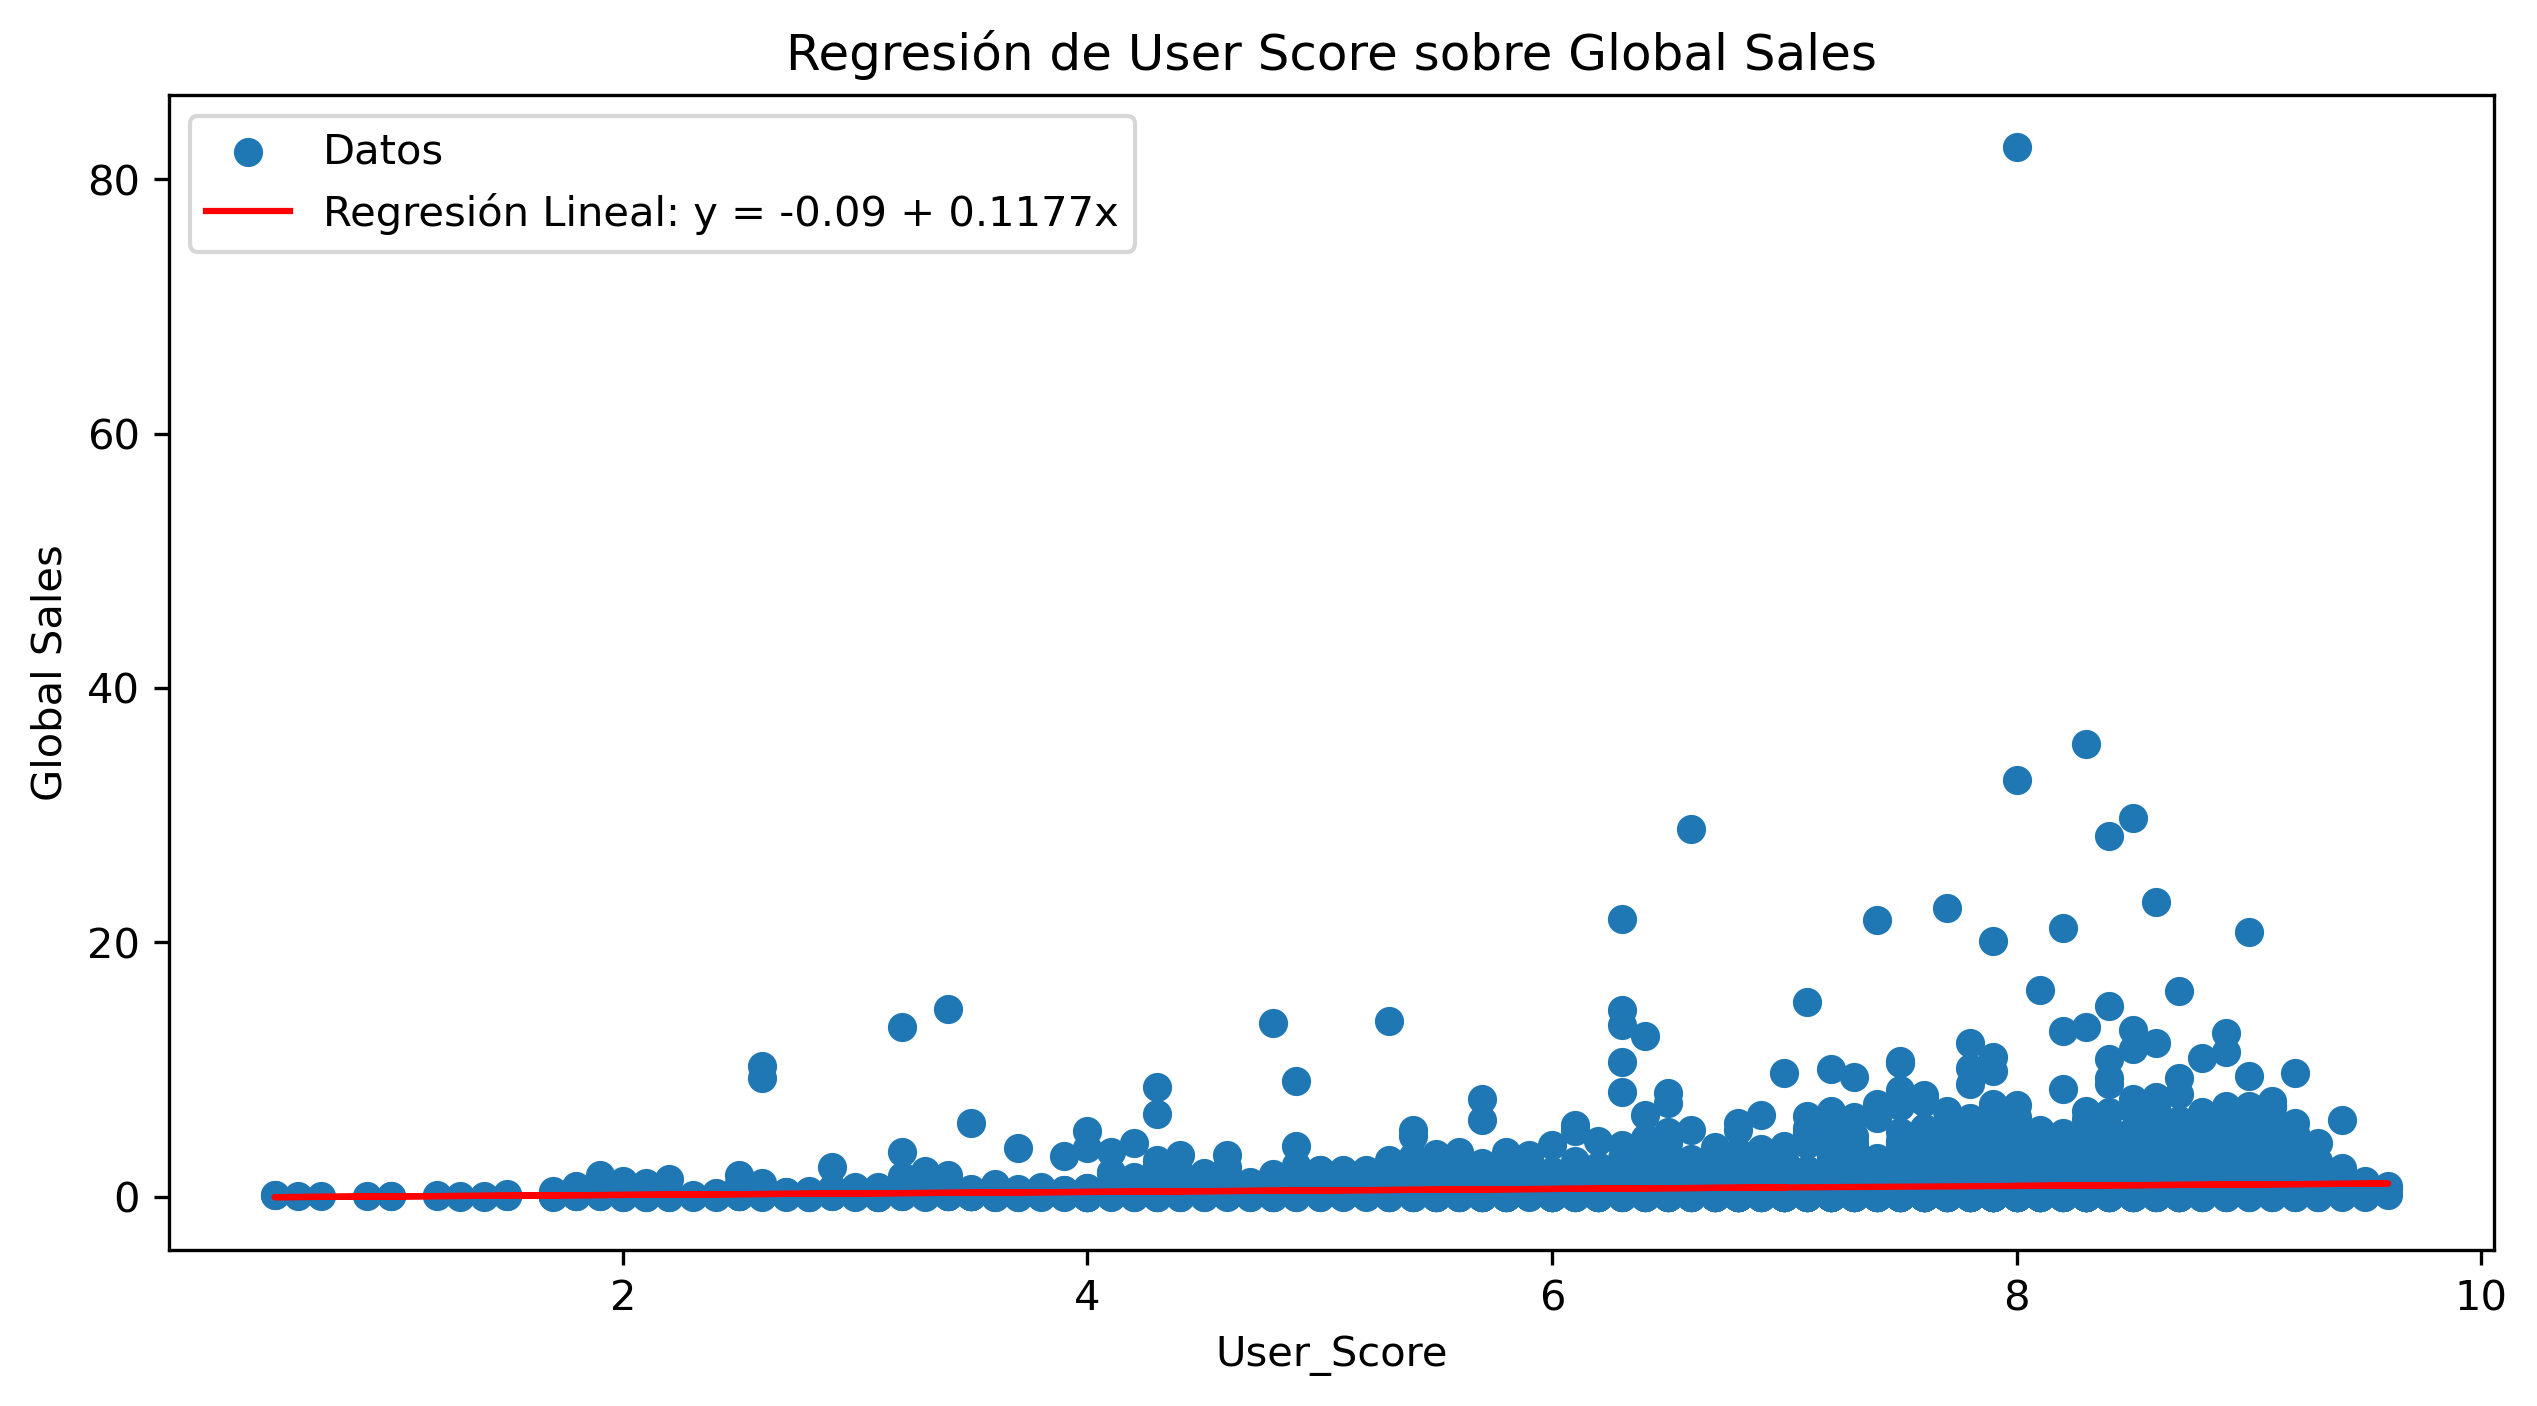

In [11]:
# Definir la variable dependiente y la independiente
y = variables['Global_Sales']
x = variables[['User_Score']]
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()

print(model.summary())

beta_0, beta_1 = model.params

# Predicción
y_hat = beta_0 + beta_1 * variables['User_Score']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.scatter(variables['User_Score'], variables['Global_Sales'], label='Datos')
ax.plot(variables['User_Score'], y_hat, color='red', label=f'Regresión Lineal: y = {beta_0:.2f} + {beta_1:.4f}x')
ax.set_xlabel('User_Score')
ax.set_ylabel('Global Sales')
ax.set_title('Regresión de User Score sobre Global Sales')
ax.legend()

### c. 
Realice el mismo procedimiento anterior, pero ahora para el coeficiente de determinación ($R^2$).

En este caso, hay que comparar el output de el coeficiente de determinación $R^2$ desde el cálculo manual y el cálculo con python.

Recordemos que el coeficiente de determinación está determinado por:
$$
R^2 = \frac{SS_R}{SS_T} = 1 - \frac{SS_E}{SS_T}
$$

Donde 
$$
\begin{align}
SS_E &= \sum_{i=1}^n(y_i - \widehat{y})^2 \\
SS_T &= \sum_{i=1}^n (y_i - \overline{y})^2\\
SS_R &= \widehat{\beta}_1 S_{XY}
\end{align}
$$

Notar que $SS_T = SS_R + SS_E$.

El coeficiente de determinación permite comprender cual es la cantidad de varianza de los datos que captura el modelo. Así, el modelo captura el $100 R^2\%$ de la varianza de los datos


In [12]:
### Coeficiente de determinación critic_score
# Definir la variable dependiente y la independiente
y = variables['Global_Sales']
media_y = y.mean()
x = variables[['Critic_Score']]
media_x = x.mean()
# modelo de regresión
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
beta_0, beta_1 = model.params
SS_T = np.sum(
    (y - y.mean()) ** 2
    )
S_XY = np.sum(
    (y - media_y) * (x['Critic_Score'] - media_x)
    )
SS_E = np.sum(
    (y - (beta_0 + beta_1 * x['Critic_Score'])) ** 2
    )

R2 = 1 - SS_E / SS_T
print(f'Coeficiente de determinación Calculado: {R2:.4f}')

print(f'Coeficiente de determinación python: {model.rsquared:.4f}')

Coeficiente de determinación Calculado: 0.0561
Coeficiente de determinación python: 0.0561


In [13]:
### Coeficiente de determinación critic_score
# Definir la variable dependiente y la independiente
y = variables['Global_Sales']
media_y = y.mean()
x = variables[['User_Score']]
media_x = x.mean()
# modelo de regresión
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
beta_0, beta_1 = model.params
SS_T = np.sum(
    (y - y.mean()) ** 2
    )
S_XY = np.sum(
    (y - media_y) * (x['User_Score'] - media_x)
    )
SS_E = np.sum(
    (y - (beta_0 + beta_1 * x['User_Score'])) ** 2
    )

R2 = 1 - SS_E / SS_T
print(f'Coeficiente de determinación Calculado: {R2:.4f}')

print(f'Coeficiente de determinación python: {model.rsquared:.4f}')

Coeficiente de determinación Calculado: 0.0078
Coeficiente de determinación python: 0.0078


## 6.
Analice ambos modelos ¿Puede ver algún outlier? ¿Cuál puntuación posee una mayor relación con la cantidad de ventas globales?

Los outliers son datos que escapan a la tendencia que poseen los datos. Por ejemplo, un sabemos que la altura de las personas rodea los 1.60 - 1.80 metros, pero ver una persona de 2.2 metros sorprende, debido a que escapa la tendencia. Esta es la idea detrás de los outliers. Permiten encontrar los datos que "sorprenden". En la mayoría de caos, estos datos pueden ser ruido o errores en la toma de muestras, mientras que en otros casos pueden ser valores sorprendentes.

Existen múltiples métodos para identificar outliers. 
- Isolation Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
- Local Outlier Factor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor
Entre otros.

En esta instancia vamos a ver la busqueda de outliers basados en la **Distancia de Cook**. La distancia de Cook se define de la siguiente forma:

$$
D_i = \frac{\sum_{j = 1}^n (\widehat{y}_j - \widehat{y}_{(j/i)})}{p s^2}
$$
Donde $\widehat{y}_j$ es la predicción j-ésima y  $\widehat{y}_{(j/i)} $ la predicción j-ésima en el modelo ajustado sin el dato $i$, $p$ es la cantidad de variables independientes en el modelo, y $s^2=\frac{SS_E}{n-p}$ es decir el error cuadrático medio del modelo.

Así, esta distancia nos permite evaluar la influencia de el punto $i$ en el modelo, que en el caso de outliers tiene da ser alta.

Text(0.5, 1.0, 'Distancia de Cook para cada observación')

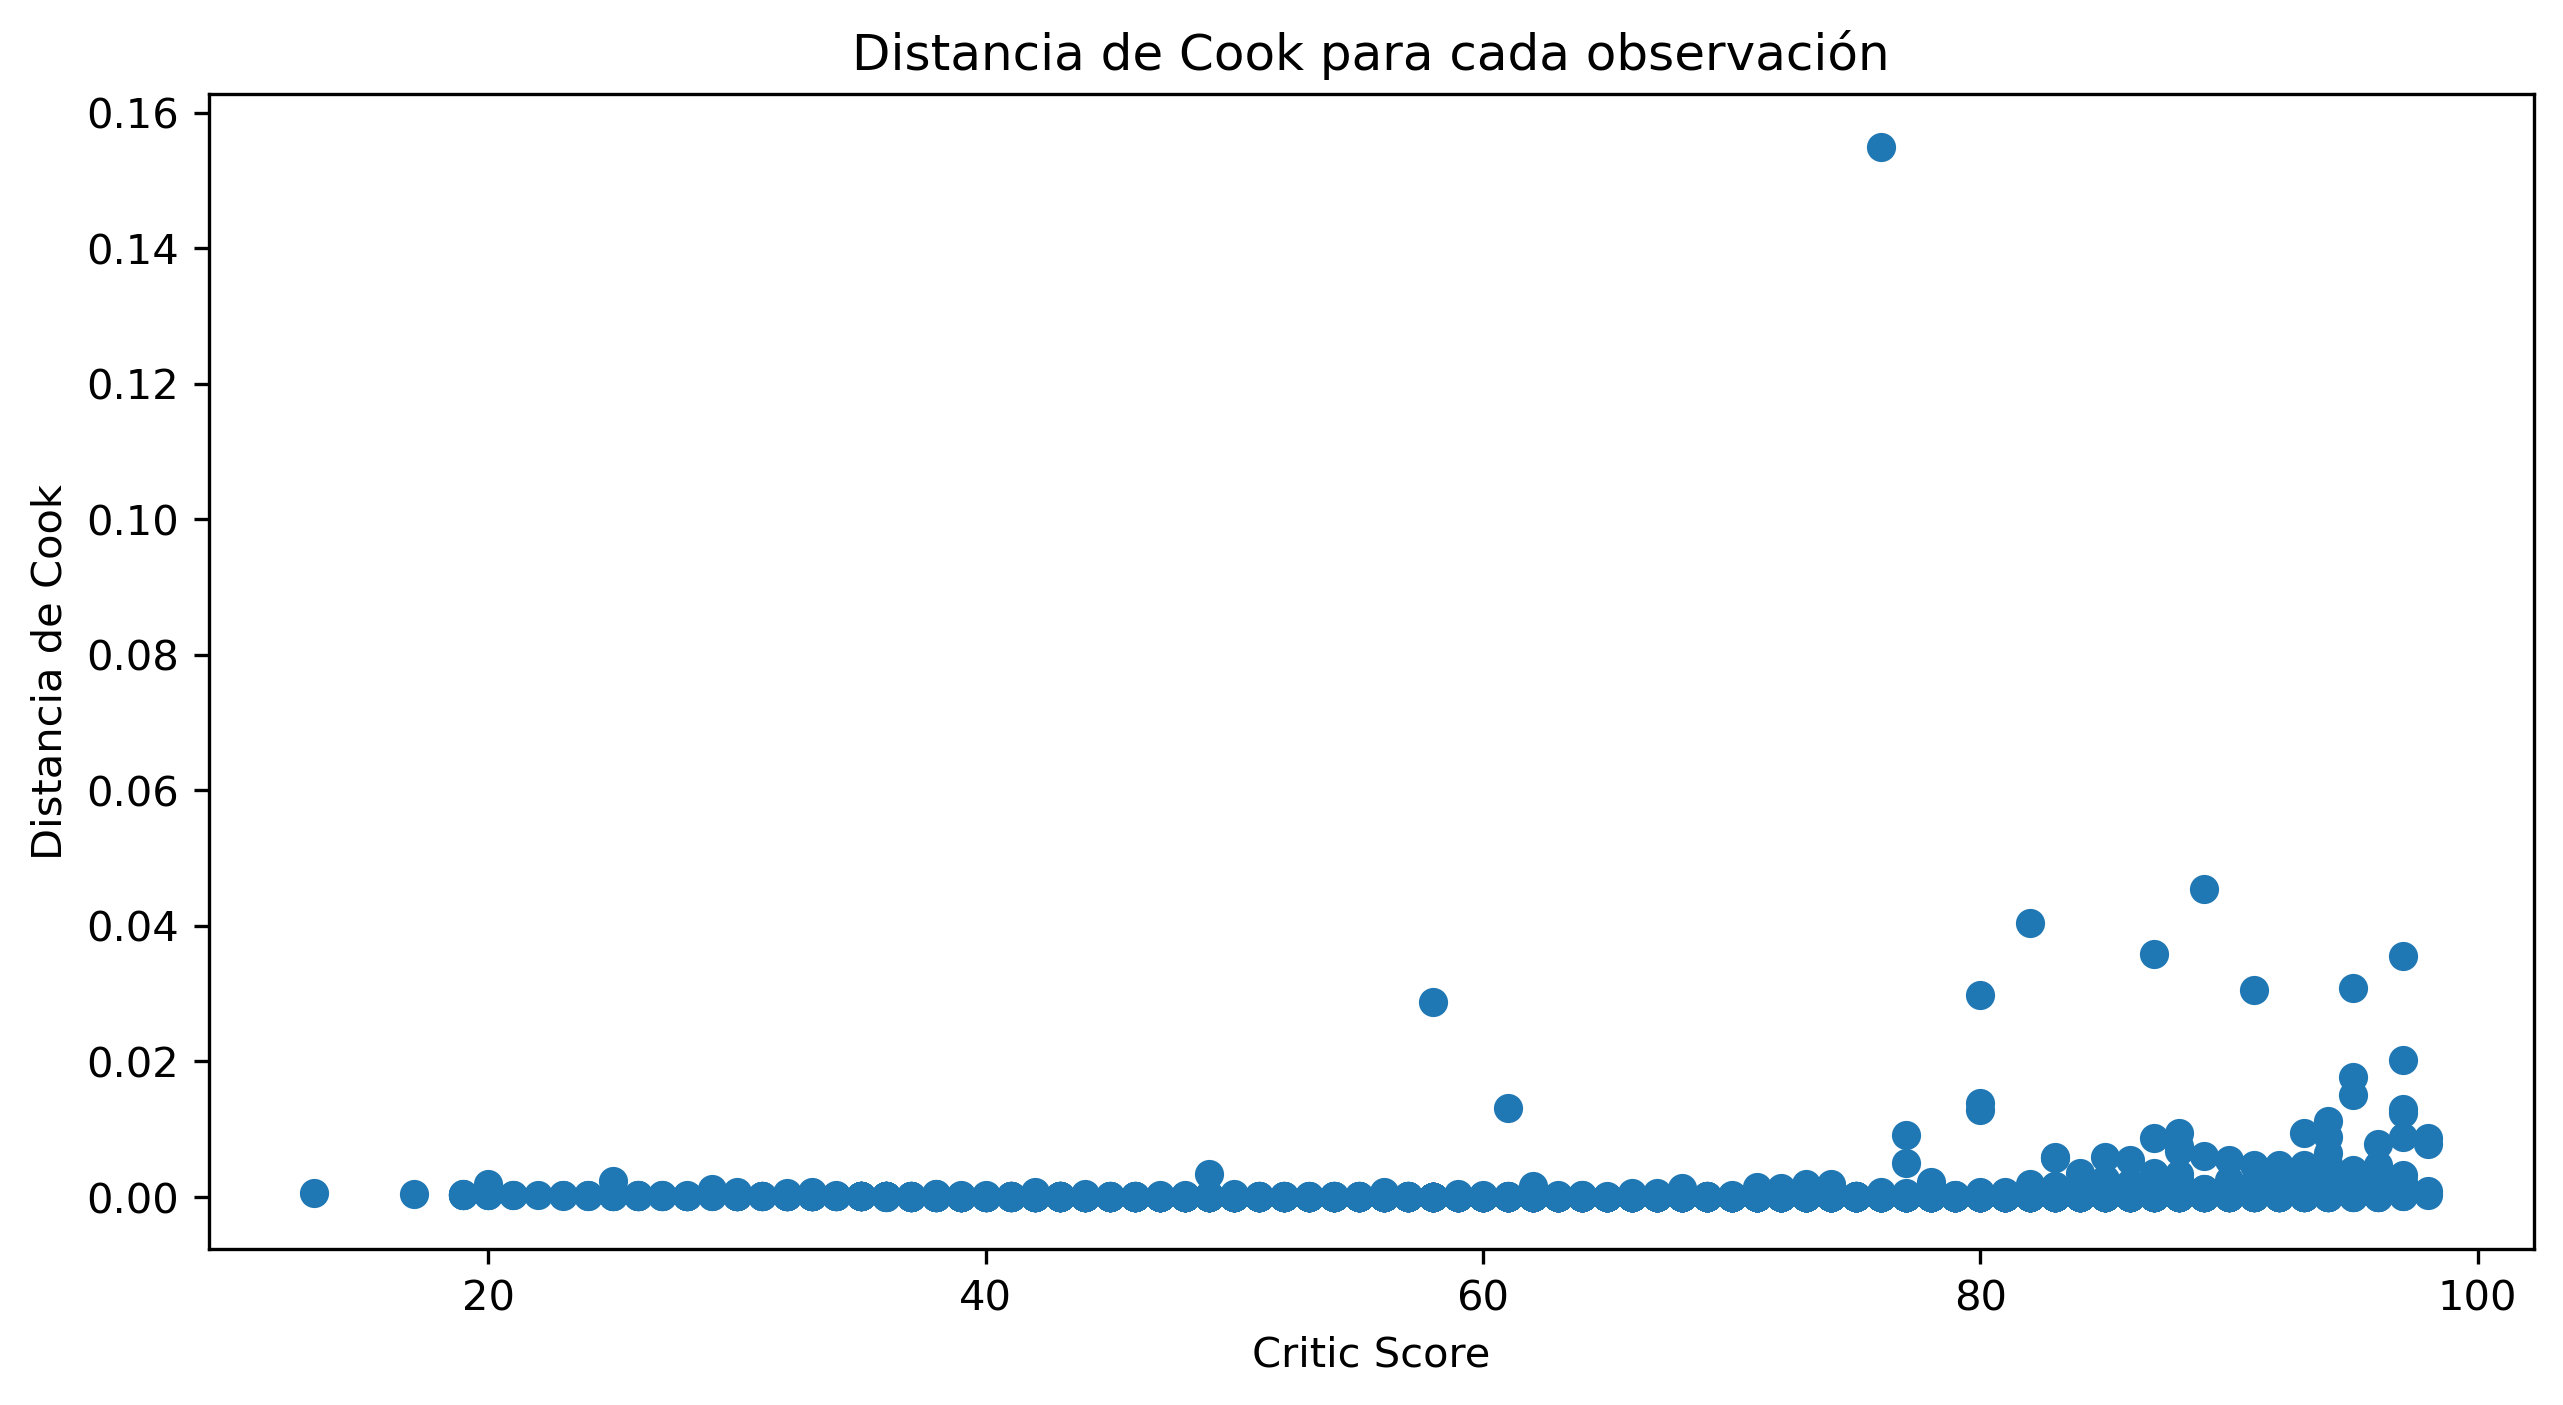

In [14]:
### Para critic score
# Definir la variable dependiente y la independiente
y = variables['Global_Sales']
x = variables['Critic_Score']
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()
influecence = model.get_influence()
cooks_distance_critic = influecence.cooks_distance[0]
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.scatter(variables['Critic_Score'], cooks_distance_critic)
ax.set_xlabel('Critic Score')
ax.set_ylabel('Distancia de Cook')
ax.set_title('Distancia de Cook para cada observación')


Text(0.5, 1.0, 'Distancia de Cook para cada observación')

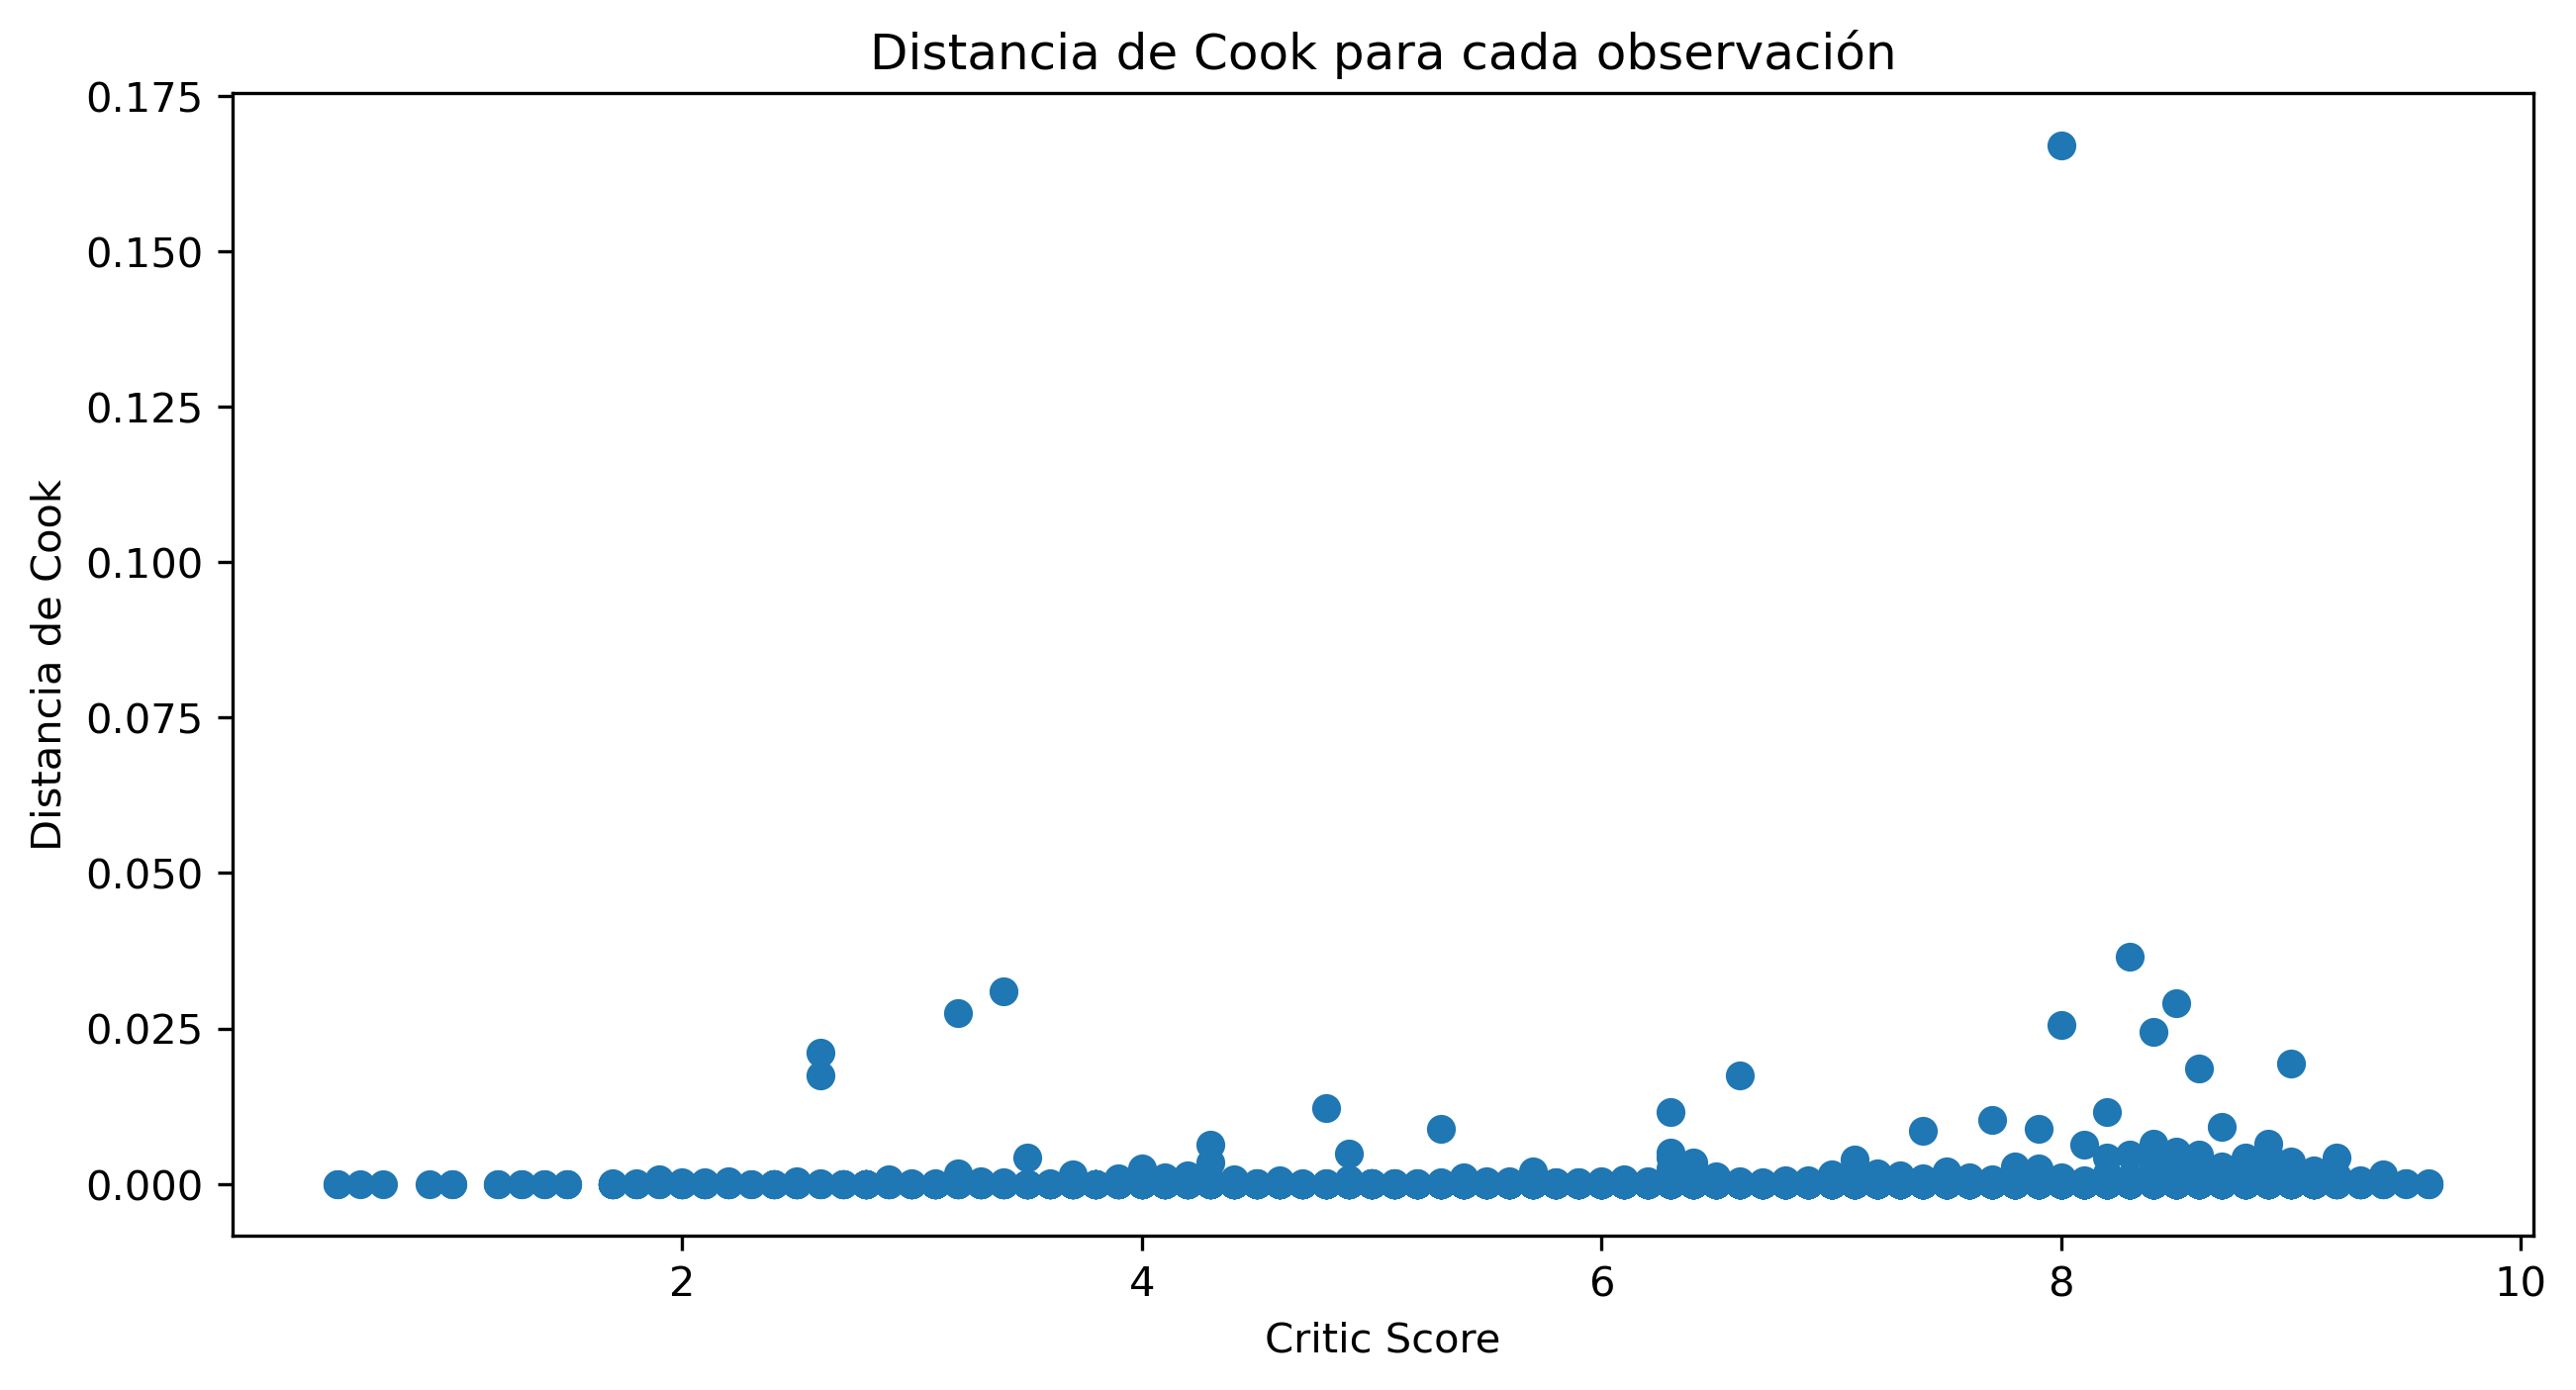

In [15]:
### Para critic score
# Definir la variable dependiente y la independiente
y = variables['Global_Sales']
x = variables['User_Score']
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()
influecence = model.get_influence()
cooks_distance_user = influecence.cooks_distance[0]
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.scatter(variables['User_Score'], cooks_distance_user)
ax.set_xlabel('Critic Score')
ax.set_ylabel('Distancia de Cook')
ax.set_title('Distancia de Cook para cada observación')


In [16]:
# cook_max
variables_cook = variables.copy()
variables_cook['Name'] = data['Name']
variables_cook['Cook_critic'] = cooks_distance_critic
variables_cook['Cook_user'] = cooks_distance_user
variables_cook = variables_cook.sort_values(by=['Cook_critic', 'Cook_user'], ascending=False)
variables_cook

,Global_Sales,Critic_Score,User_Score,Name,Cook_critic,Cook_user
0,82.54,76.0,8.0,Wii Sports,1.549610e-01,1.670721e-01
6,29.81,89.0,8.5,New Super Mario Bros.,4.541239e-02,2.903702e-02
2,35.57,82.0,8.3,Mario Kart Wii,4.044439e-02,3.648626e-02
8,28.38,87.0,8.4,New Super Mario Bros. Wii,3.578909e-02,2.451270e-02
16,21.12,97.0,8.2,Grand Theft Auto V,3.557829e-02,1.163149e-02
...,...,...,...,...,...,...
6096,0.29,56.0,7.5,Warriors Orochi 2,6.840577e-11,5.095466e-06
2125,0.98,77.0,7.9,LEGO Harry Potter: Years 5-7,6.233014e-11,4.370905e-07
2113,0.98,77.0,8.2,Tales of Graces f,6.233014e-11,2.877687e-07
8537,0.16,52.0,7.1,NBA Live 08,1.895977e-12,6.581712e-06


## 7.

Analice los residuos de sus modelos. ¿Se cumplen los supuestos de normalidad y homocedasticidad de estos?

Un supuesto importante -y super fuerte- que se realiza a la hora de hacer una regresión lineal es que los residuos siguen una distribución Normal. Es decir $\varepsilon \sim \mathcal{N}(0, \sigma ^ 2)$, siendo $\sigma ^2$ una constante.

Así, además de realizar el ajuste de los parámetros, es necesario realizar el análisis de los residuos del modelo para evaluar la efectividad y veracidad del mismo.

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7191.
  res = hypotest_fun_out(*samples, **kwds)


Text(0.5, 0.98, 'Distribución de los residuos -Critic Score & Global-')

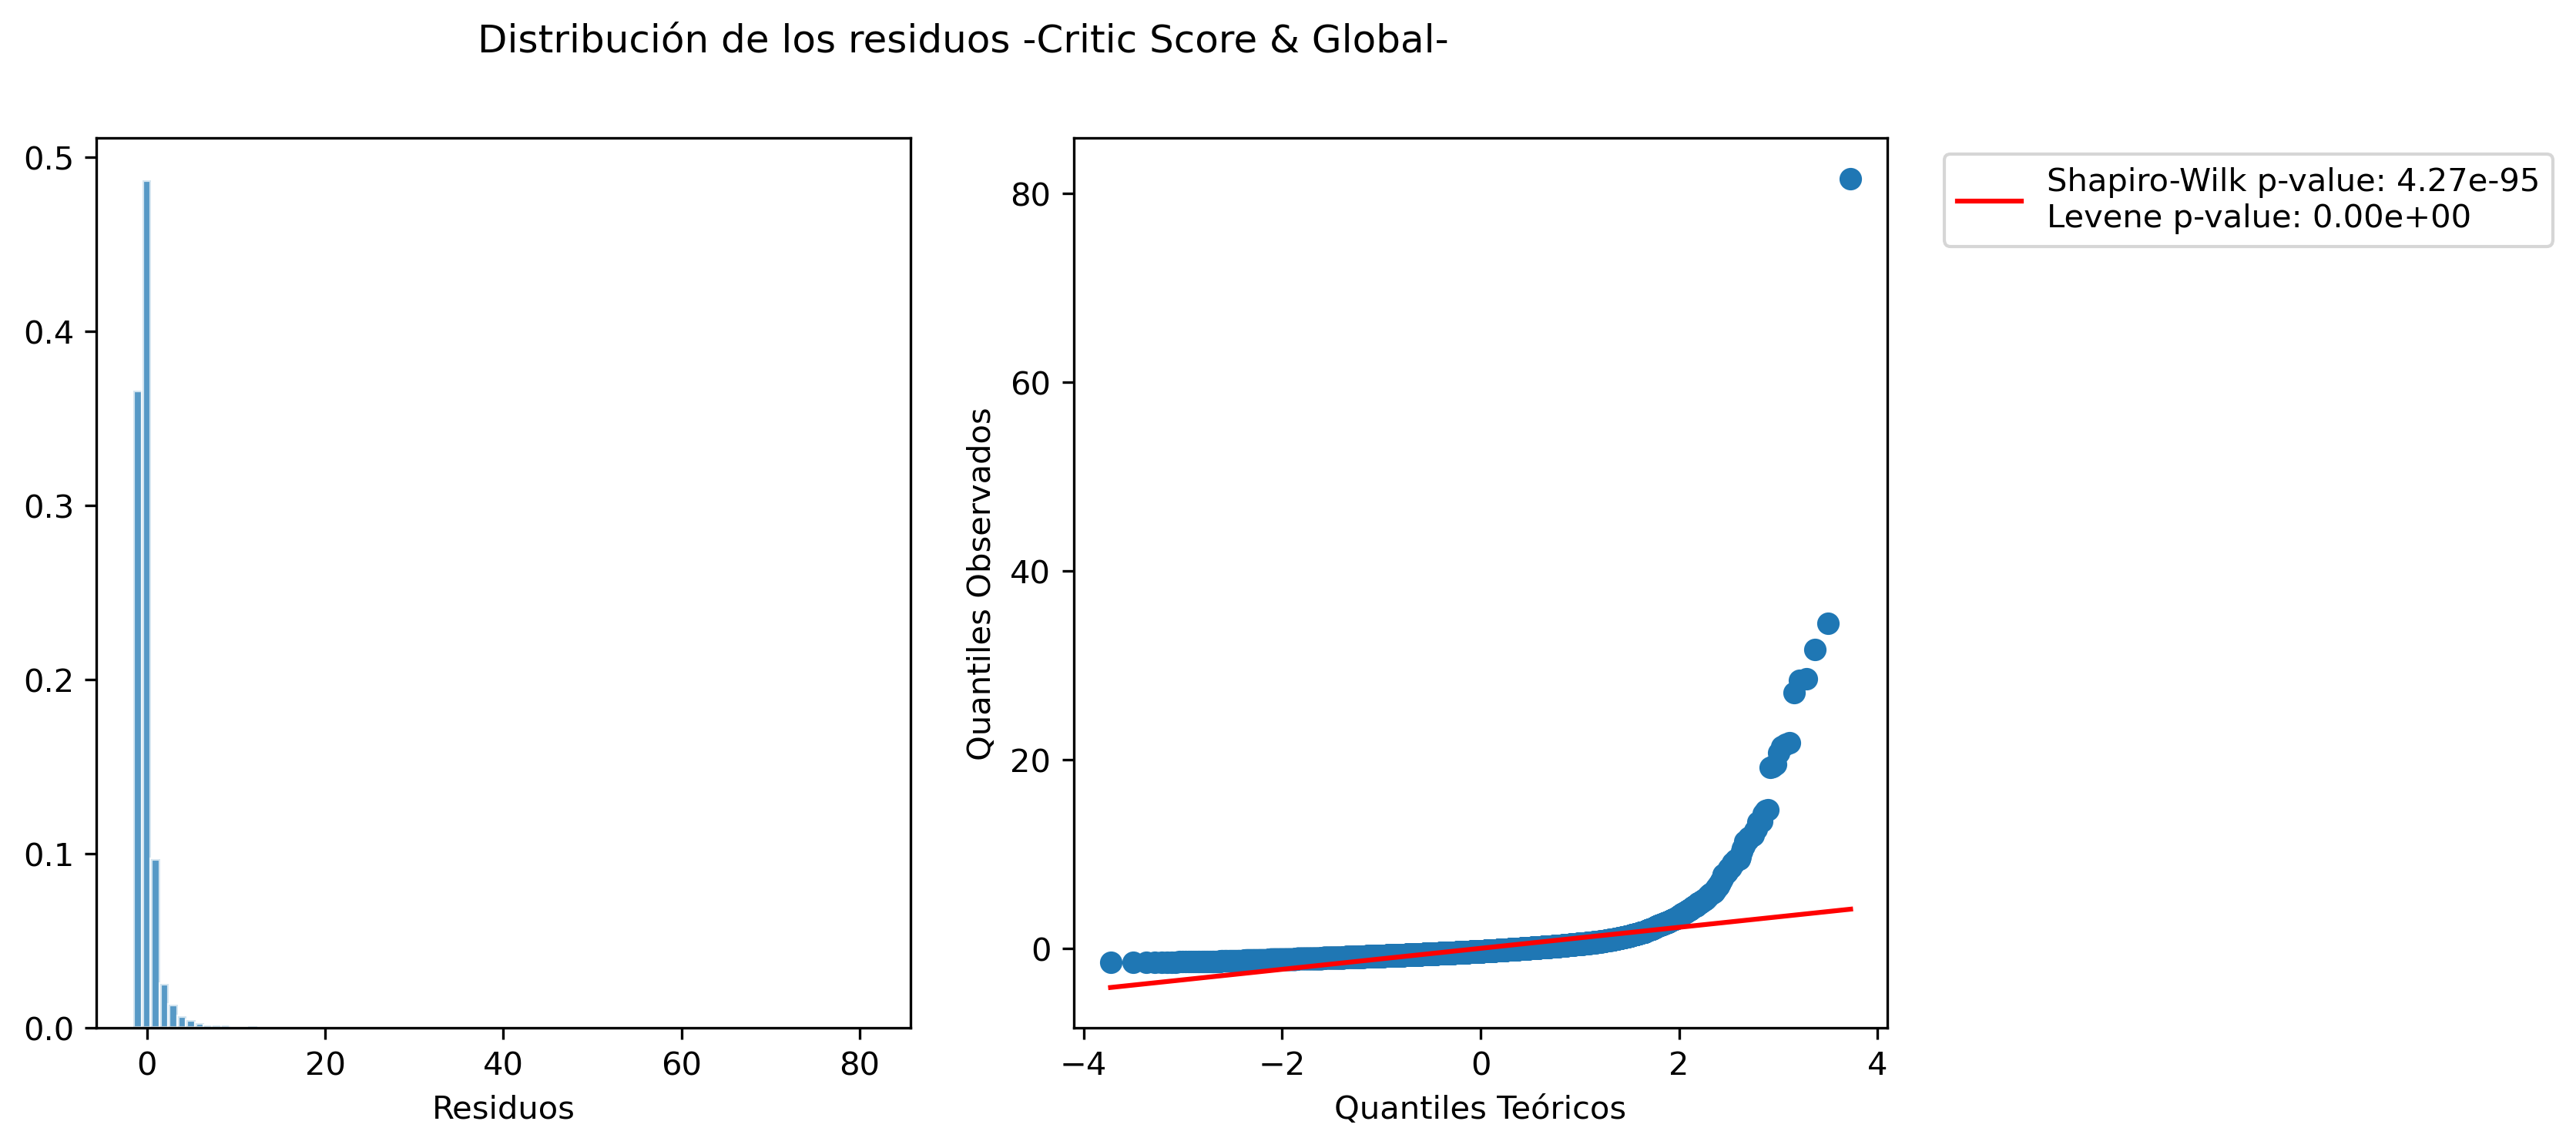

In [17]:
### Critic Score y Global Sales
x = variables['Critic_Score']
y = variables['Global_Sales']
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()

residuals = model.resid

###
fig, ax = plt.subplots(1,2,figsize=(10, 5), dpi=300)
ax[0].hist(residuals, bins=np.sqrt(len(x)).astype(int), density=True, alpha = 0.75,
           edgecolor = 'white')
ax[0].set_xlabel('Residuos')


levene_p = st.levene(variables['Critic_Score'], variables['Global_Sales'])[1]
shapiro_p = st.shapiro(residuals)[1]

(osm, osr), (slope, intercept, r) = st.probplot(residuals, dist="norm")
ax[1].scatter(osm, osr)
ax[1].plot(osm, slope * osm + intercept, color='red', 
           label = f'Shapiro-Wilk p-value: {shapiro_p:.2e}\nLevene p-value: {levene_p:.2e}')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].set_xlabel('Quantiles Teóricos')
ax[1].set_ylabel('Quantiles Observados')
fig.suptitle('Distribución de los residuos -Critic Score & Global-')

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7191.
  res = hypotest_fun_out(*samples, **kwds)


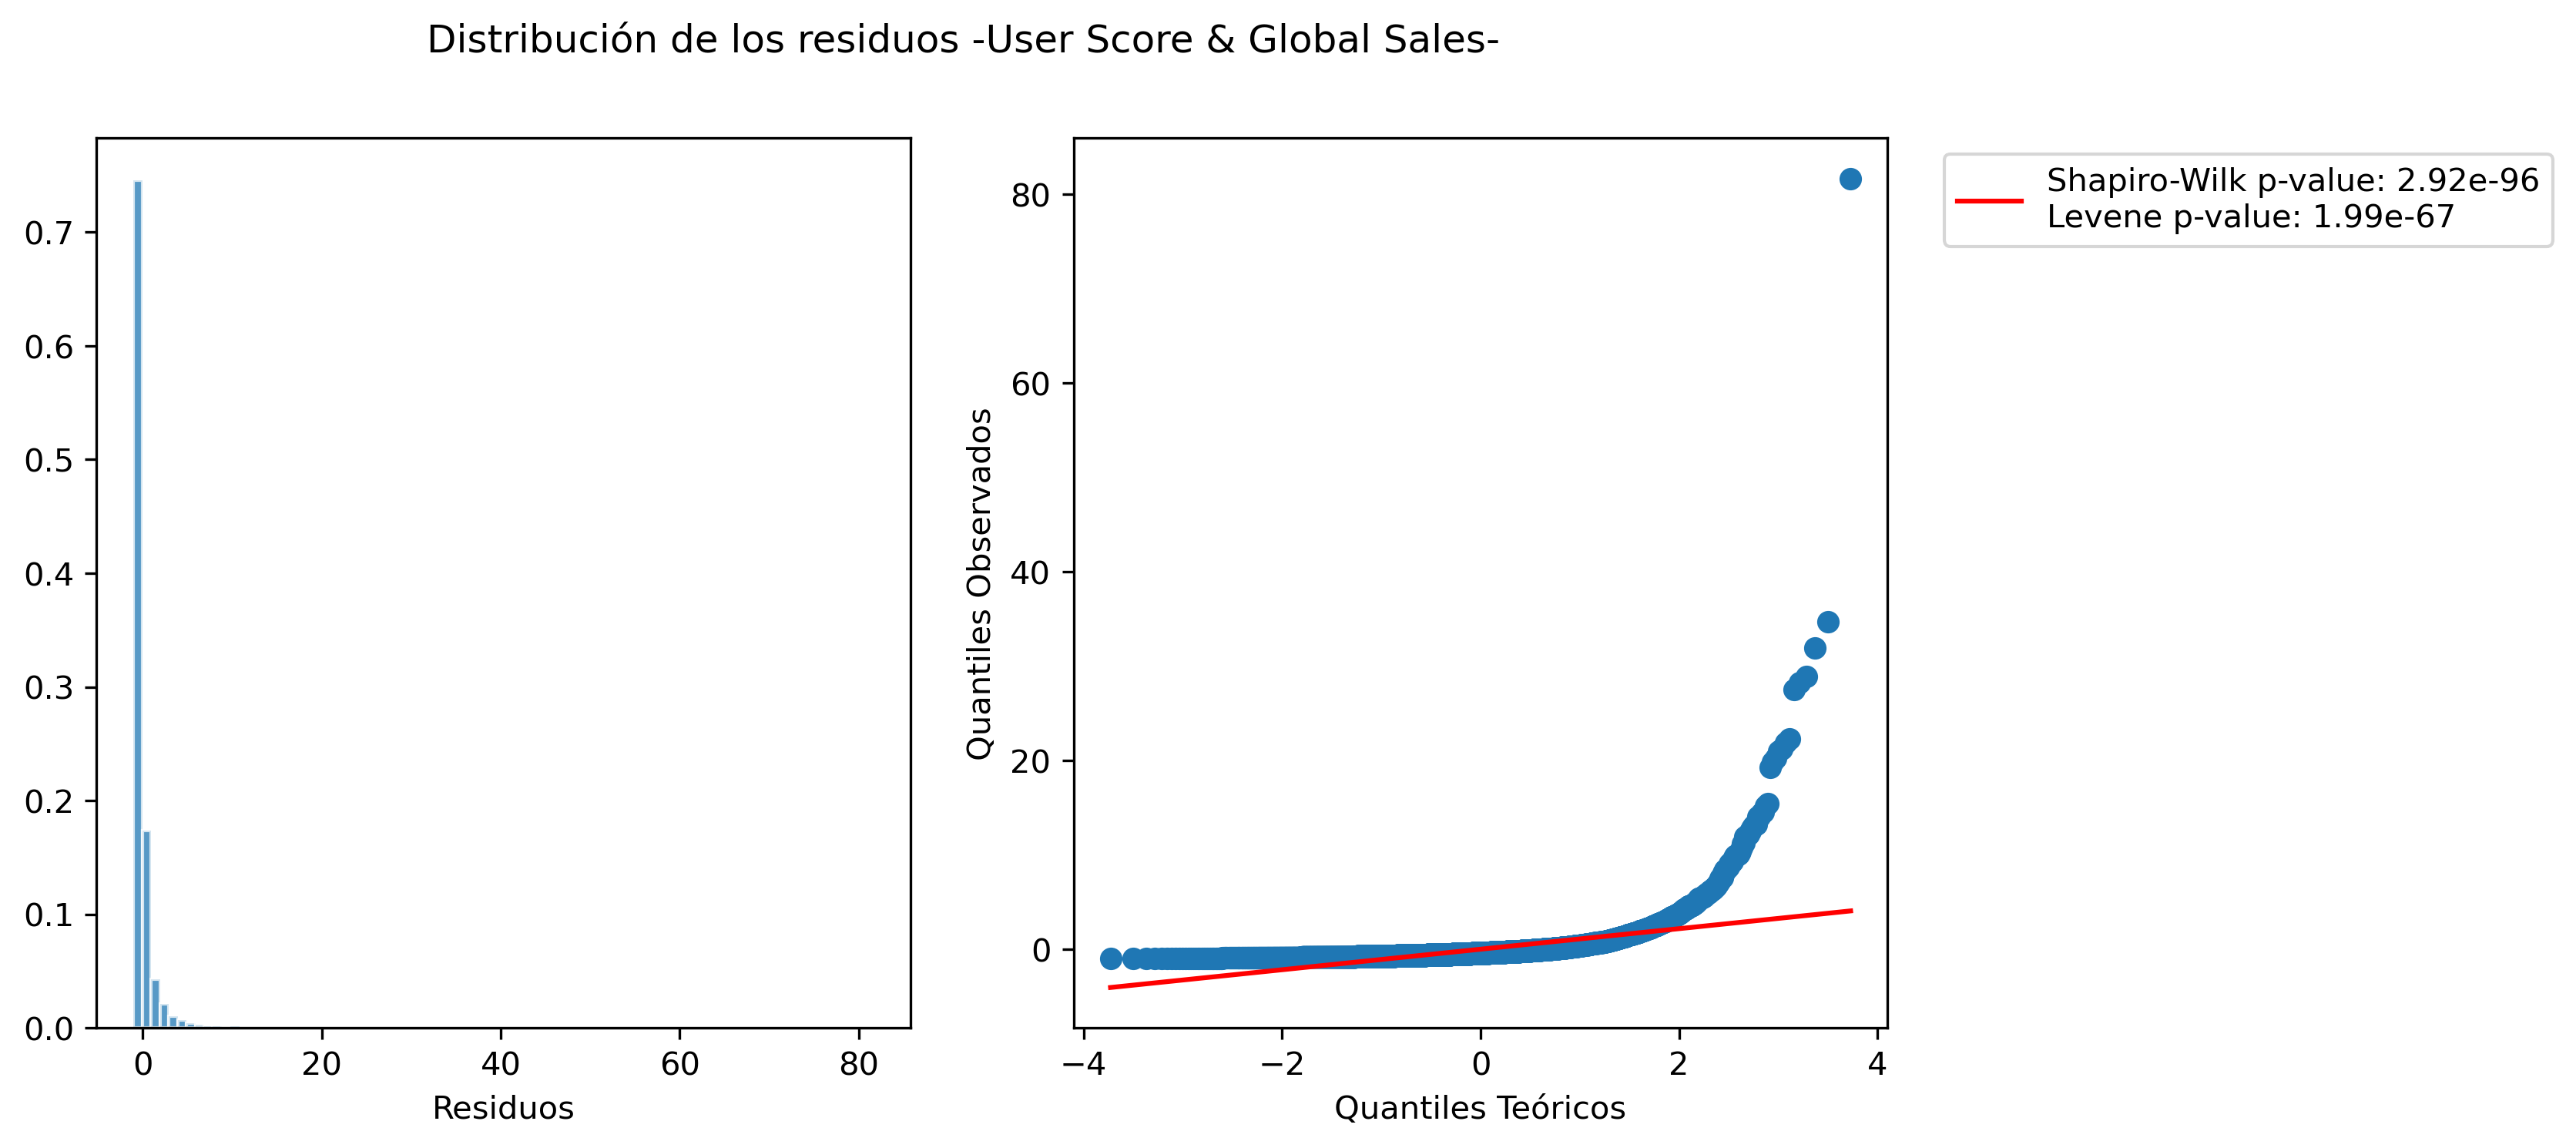

In [18]:
### Critic Score y Global Sales
x = variables['User_Score']
y = variables['Global_Sales']
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()

residuals = model.resid

###
fig, ax = plt.subplots(1,2,figsize=(10, 5), dpi=300)
ax[0].hist(residuals, bins=np.sqrt(len(x)).astype(int), density=True, alpha = 0.75,
           edgecolor = 'white')
ax[0].set_xlabel('Residuos')

levene_p = st.levene(variables['User_Score'], variables['Global_Sales'])[1]
shapiro_p = st.shapiro(residuals)[1]

(osm, osr), (slope, intercept, r) = st.probplot(residuals, dist="norm")
ax[1].scatter(osm, osr)
ax[1].plot(osm, slope * osm + intercept, color='red', 
           label = f'Shapiro-Wilk p-value: {shapiro_p:.2e}\nLevene p-value: {levene_p:.2e}')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].set_xlabel('Quantiles Teóricos')
ax[1].set_ylabel('Quantiles Observados')
fig.suptitle('Distribución de los residuos -User Score & Global Sales-')
plt.show()

## 8.

Replique su análisis pero ahora relacionando `Critic_Score` y `User_Score`. ¿Qué puede decir?

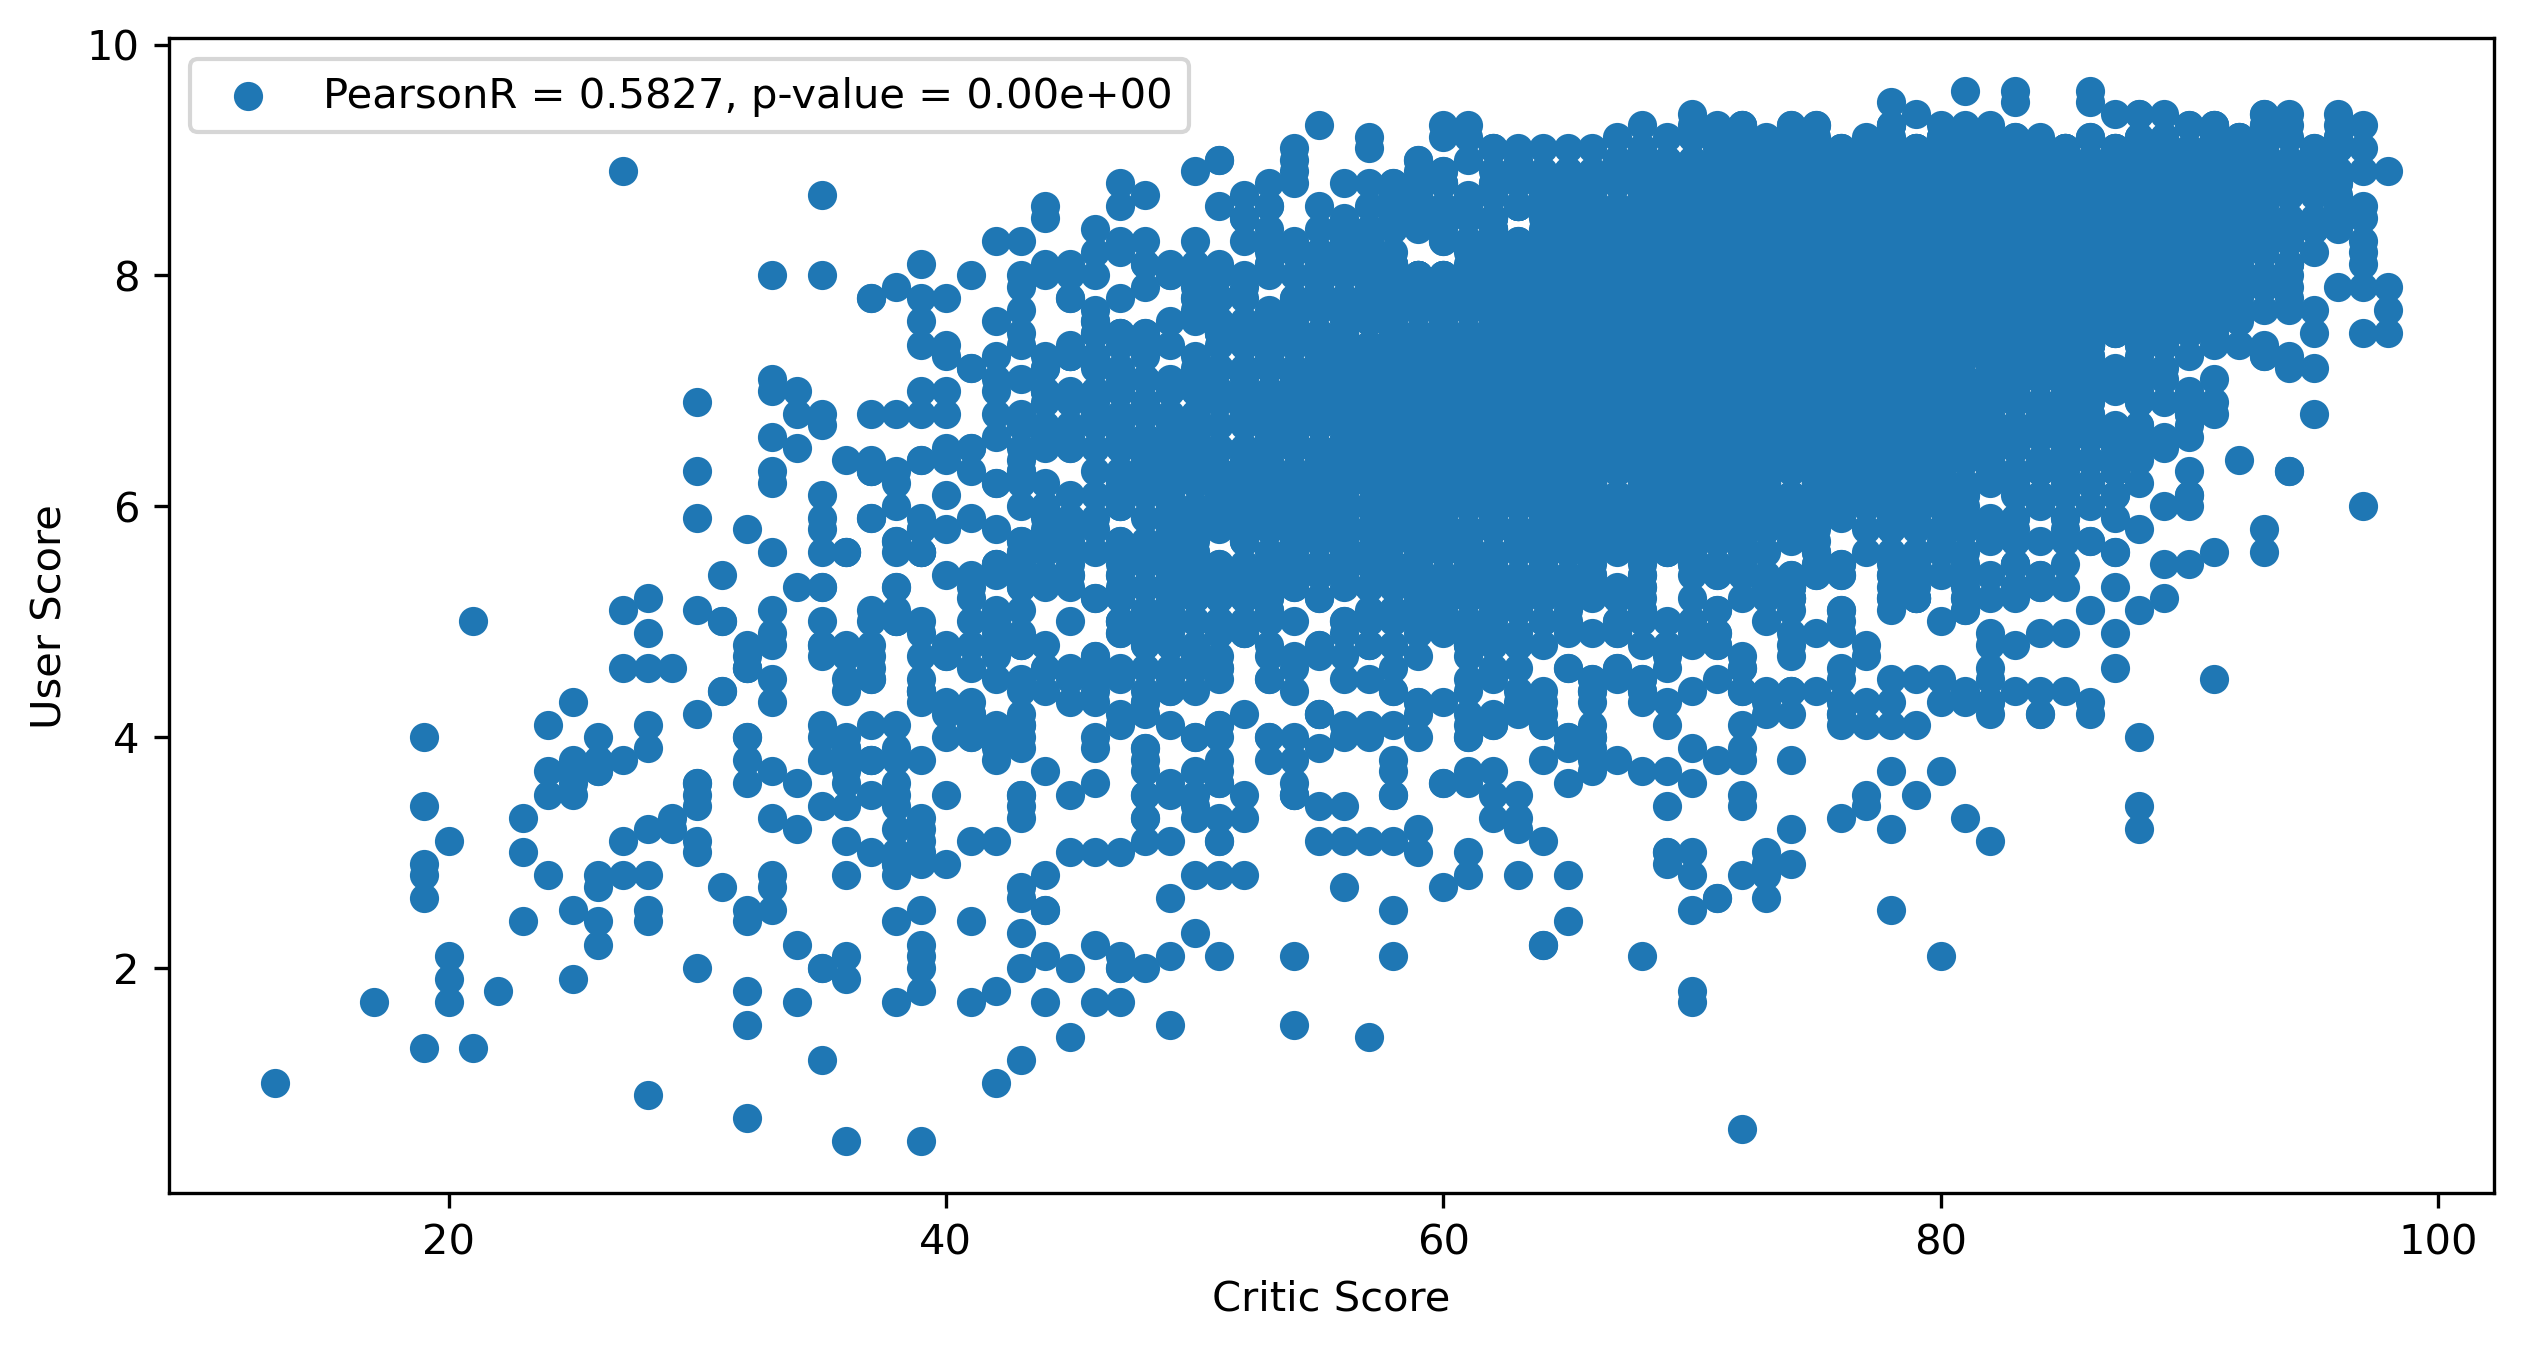

In [19]:
## Asociación
x = variables['Critic_Score']
y = variables['User_Score']

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
pearson_corr, pearson_pval = st.pearsonr(x, y)
spearman_corr, spearman_pval = st.spearmanr(x, y)
ax.scatter(x, y, label = f'PearsonR = {pearson_corr:.4f}, p-value = {pearson_pval:.2e}')
ax.legend()
ax.set_xlabel('Critic Score')
ax.set_ylabel('User Score')
plt.show()

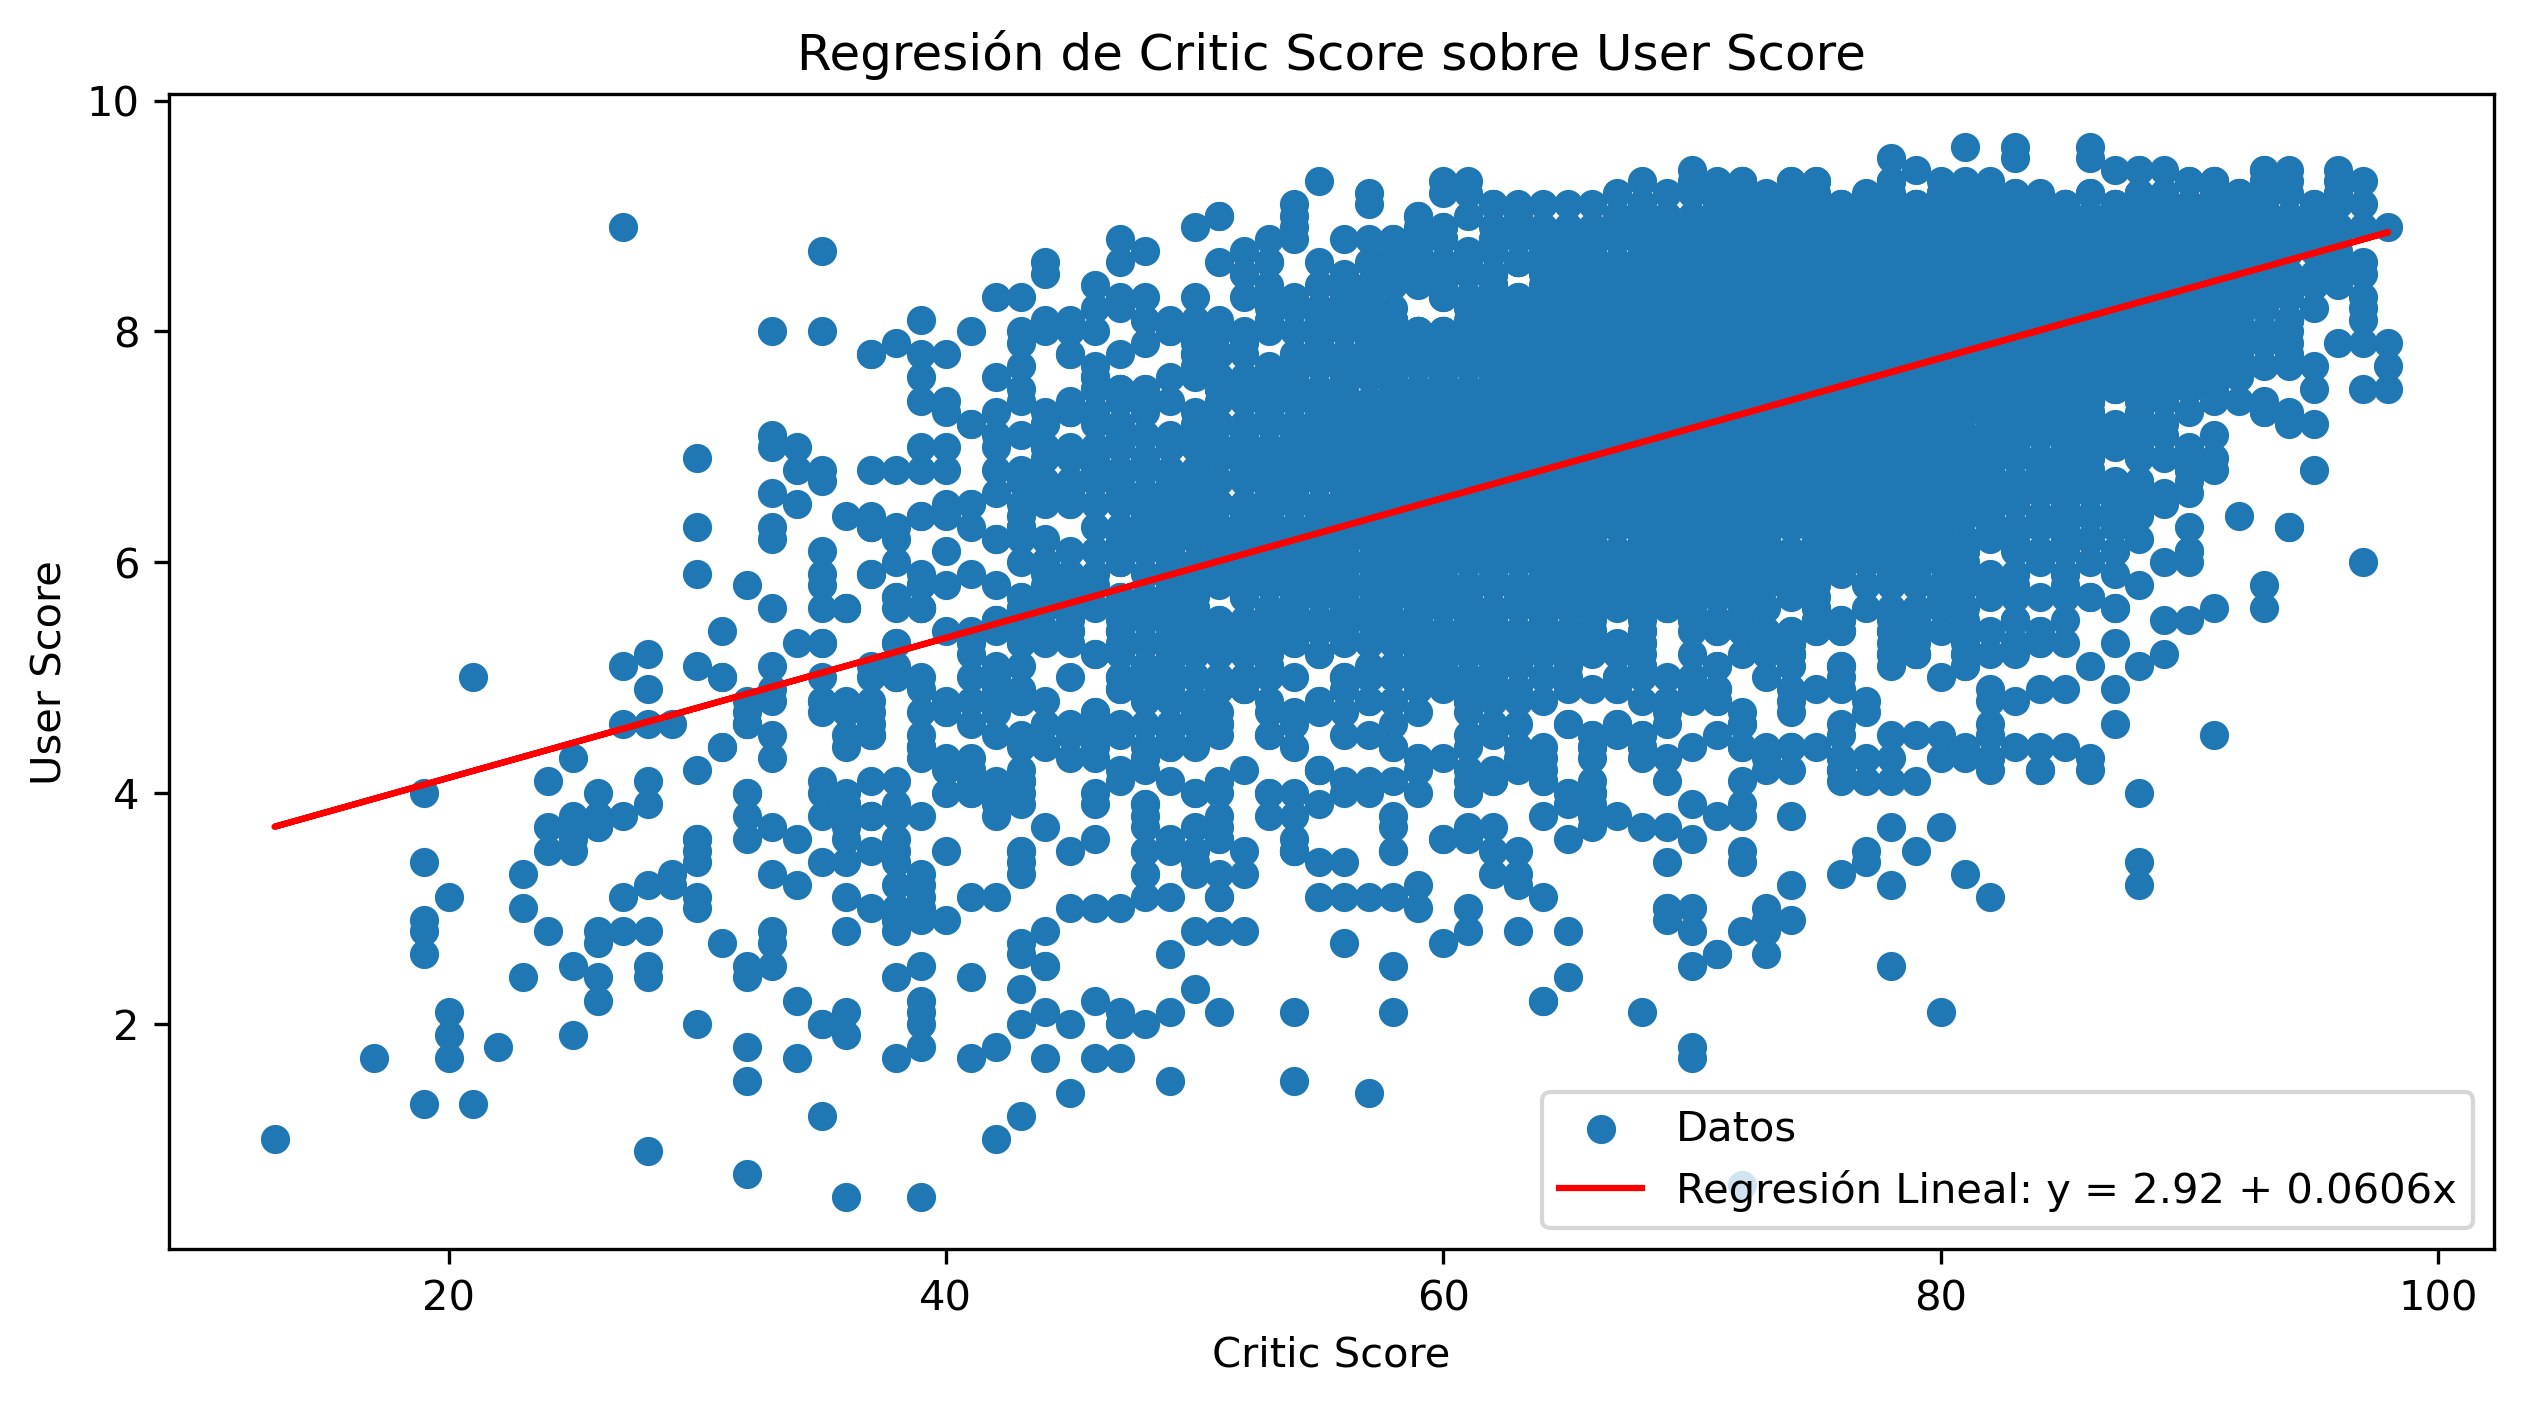

In [20]:
## Regresión lineal

x = variables['Critic_Score']
y = variables['User_Score']
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()
beta_0, beta_1 = model.params
# Predicción
y_hat = beta_0 + beta_1 * variables['Critic_Score']
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.scatter(variables['Critic_Score'], variables['User_Score'], label='Datos')
ax.plot(variables['Critic_Score'], y_hat, color='red', label=f'Regresión Lineal: y = {beta_0:.2f} + {beta_1:.4f}x')
ax.set_xlabel('Critic Score')
ax.set_ylabel('User Score')
ax.set_title('Regresión de Critic Score sobre User Score')
ax.legend()
plt.show()

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             User_Score   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     3696.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        09:46:14   Log-Likelihood:                -11355.
No. Observations:                7191   AIC:                         2.271e+04
Df Residuals:                    7189   BIC:                         2.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9179      0.071     40.887   

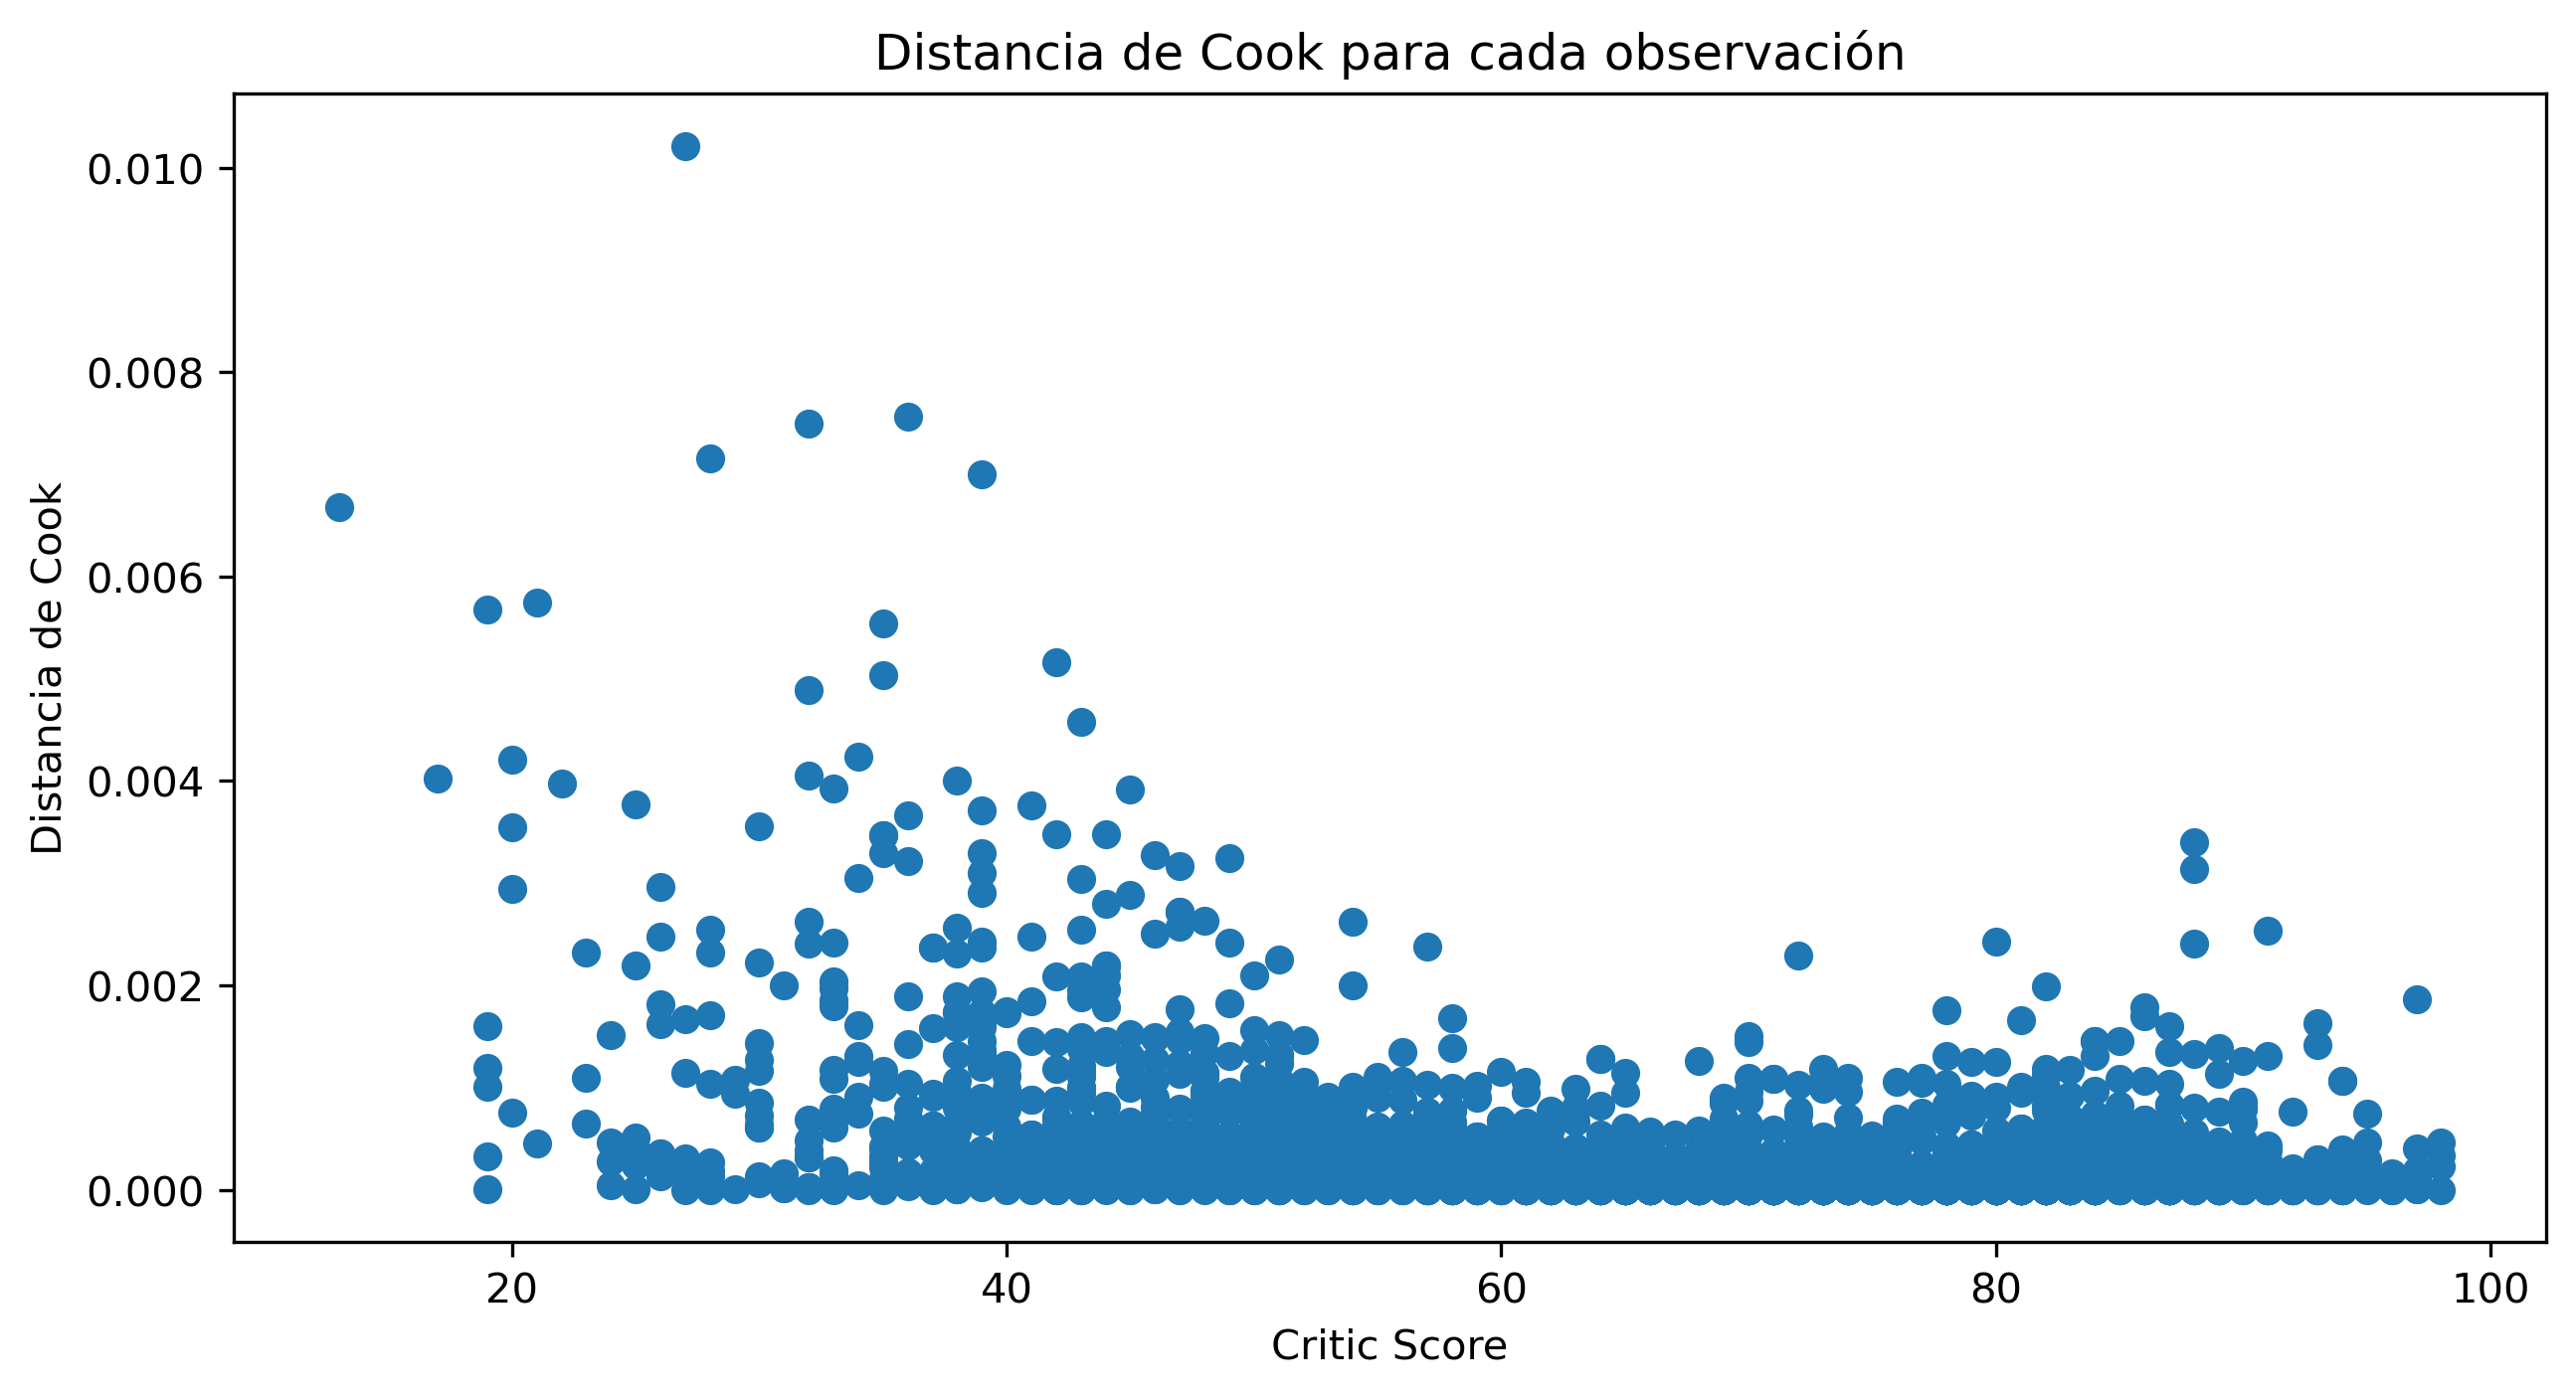

,Global_Sales,Critic_Score,User_Score,Name,Cook
5857,0.30,27.0,8.9,Shrek Swamp Kart Speedway,1.021447e-02
9203,0.14,36.0,0.5,Power Gig: Rise of the SixString,7.567575e-03
13490,0.05,32.0,0.7,Pool Party,7.498537e-03
10793,0.10,28.0,0.9,Dragon Ball: Evolution,7.155991e-03
10318,0.11,39.0,0.5,Charlie and the Chocolate Factory,6.998401e-03
...,...,...,...,...,...
8126,0.18,69.0,7.1,Mega Man X: Command Mission,1.118889e-11
9926,0.12,69.0,7.1,NFL Head Coach,1.118889e-11
2765,0.75,69.0,7.1,Turok,1.118889e-11
14398,0.03,69.0,7.1,MotoGP,1.118889e-11


In [22]:
## Cook's distance
# Definir la variable dependiente y la independiente
y = variables['User_Score']
x = variables['Critic_Score']
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()
influecence = model.get_influence()
cooks_distance = influecence.cooks_distance[0]
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
ax.scatter(variables['Critic_Score'], cooks_distance)
ax.set_xlabel('Critic Score')
ax.set_ylabel('Distancia de Cook')
ax.set_title('Distancia de Cook para cada observación')
plt.show()
variables_cook_2 = variables.copy()
variables_cook_2['Name'] = data['Name']
variables_cook_2['Cook'] = cooks_distance
variables_cook_2 = variables_cook_2.sort_values(by=['Cook'], ascending=False)
variables_cook_2

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7191.
  res = hypotest_fun_out(*samples, **kwds)


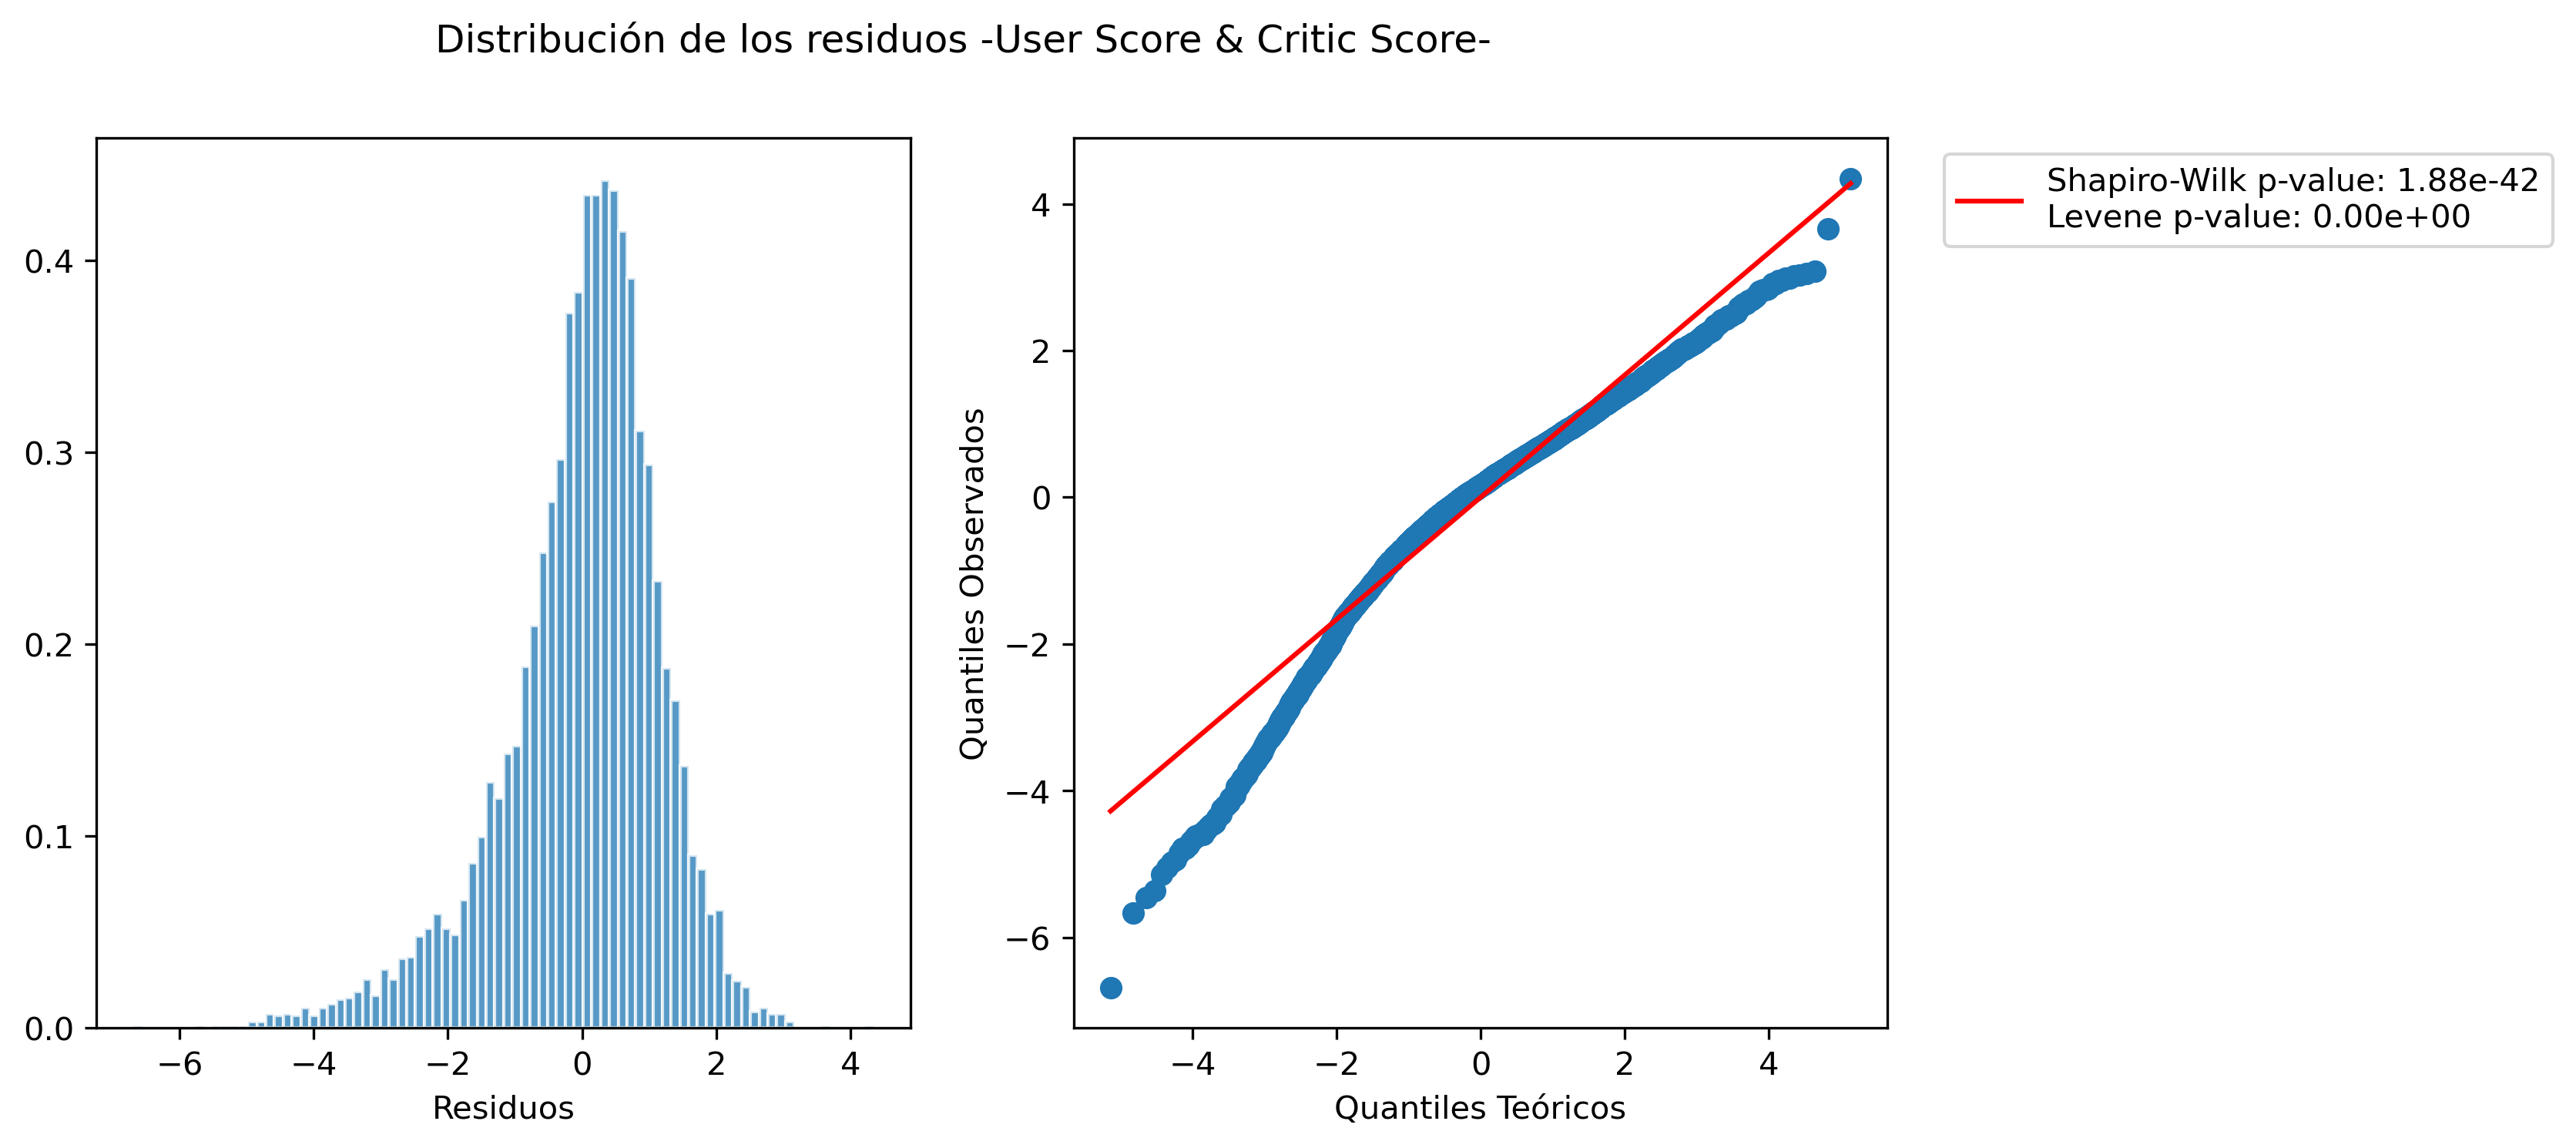

In [23]:
# Analisis de los residuos
# Definir la variable dependiente y la independiente
y = variables['User_Score']
x = variables['Critic_Score']
# Agregar una constante a la variable independiente
x = sm.add_constant(x)
# Crear el modelo de regresión
model = sm.OLS(y, x).fit()
residuals = model.resid
fig, ax = plt.subplots(1,2,figsize=(10, 5), dpi=300)
ax[0].hist(residuals, bins=np.sqrt(len(x)).astype(int), density=True, alpha = 0.75,
           edgecolor = 'white')
ax[0].set_xlabel('Residuos')
levene_p = st.levene(variables['Critic_Score'], variables['User_Score'])[1]
shapiro_p = st.shapiro(residuals)[1]
(osm, osr), (slope, intercept, r) = st.probplot(residuals,
                                                dist = st.norm,
                                                sparams=(0, np.var(residuals)))
ax[1].scatter(osm, osr)
ax[1].plot(osm, slope * osm + intercept, color='red', 
           label = f'Shapiro-Wilk p-value: {shapiro_p:.2e}\nLevene p-value: {levene_p:.2e}')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax[1].set_xlabel('Quantiles Teóricos')
ax[1].set_ylabel('Quantiles Observados')
fig.suptitle('Distribución de los residuos -User Score & Critic Score-')
plt.show()
